# <center> **Entrega 1 Proyecto Spotify Popularity Prediction**</center>

AUTORES: Luciano Colucci, Micaela Ferrari Navarro, Melisa Leyton, Domingo Rizzi

---

1.   Problema de Negocio

Con la creciente cantidad de posibilidades para los artistas de componer y crear su propia música, inclusive desde la comodidad de su casa, subirla a internet y convertirla en un hit, las discográficas que representan a los músicos están teniendo cada vez más problemas en discernir qué canción se convertirá en un hit o cuál ganará más popularidad que otra. 
El nuevo término acuñado para estos artistas es “Bedroom Producer”, o productor de dormitorio. Hoy en día, cualquier persona con una computadora portátil, un smartphone o una tablet tiene el potencial de convertirse en un productor musical exitoso. En el mercado musical actual, algunos de los artistas más exitosos ahora son Bedroom Producers como Grimes, Richie Hawtin, Flume o Billy Eilish.
Cabe mencionar que, si bien el problema de negocio mencionado es de las discográficas, el modelo desarrollado en este proyecto también puede ser vendido a los mencionados Bedroom Producers. 


2.   Contexto


Partimos de la base de que las canciones que se convierten en hits tienen ciertas cualidades que otras canciones no tienen, las cuales la convierten en un potencial track exitoso para ciertos artistas. Libros como “The Song Machine” de John Seabrook, y varios papers como “Hit Song Science Is Not Yet a Science” y “Automatic Prediction of Hit Songs” apoyan la teoría de que las canciones que se convierten en hits o ganan mucha popularidad están de hecho diseñadas para ser convertirse en tales. 

3. Hipótesis

Nuestra hipótesis es que existen canciones que tienen ciertos atributos, los cuales predisponen al track a convertirse en un hit con mayor probabilidad que otros tracks. Estos atributos son intrínsecos de la canción, o extrínsecos a la misma (es decir, pueden ser variables del contexto, del álbum en el que fue lanzado, la época del año, entre otros). 
La utilización de estas variables en un modelo supervisado de clasificación de Machine Learning nos permitirá predecir con cierta seguridad si una canción será o no un éxito.

4. Desarrollo del Modelo

- Database

Se tomó como base de datos el dataset “Spotify and Genious Track Dataset”. Los datos se obtuvieron de la API de Spotify, y son relativos a los Tracks, Albums y Artistas. Está divido en tres documentos .csv según este criterio. El primer archivo de tracks contiene en él las audio features, o características de la canción mencionadas anteriormente como letra, energía, género y más, además de por supuesto la información principal de una canción como su nombre, artista y duración. El segundo y tercero tienen más data informativa, como el álbum, el artista, la fecha de lanzamiento de un álbum, qué álbum es de ese artista y más.
Para desarrollar el modelo de Machine Learning se unieron estos tres datasets separados para obtener un único dataset que tuviera información más completa sobre los tracks. Las uniones se hicieron a partir de variables en común entre los dataset, como “Artist ID” (al unir Tracks y Artistas) y “Album ID” (al unir el anterior con Albums).
El objetivo de tener información más completa es proveer al cliente un mayor control de las variables que influyen en el éxito de una canción. Mientras más información se tenga sobre cuáles son los determinantes para que un track se convierta en un hit, mayor control se tiene sobre la definición de esos determinantes y se tendrá mayor probabilidad de logra el éxito con un track. En un futuro utópico, quizás pueda crearse una “Máquina de Hits”, si se obtienen los ingredientes para la receta del éxito para una canción.

- Variables

Nuestra variable target será el grado de popularidad de un track. La variable es numérica decimal, y se encuentra como “popularity” en el dataset de Tracks. 
Para obtener una variable categórica de la misma, se creó la variable “popularity_cat” que define cuatro categorías de popularidad, asociada a la variable númerica de “popularity” de manera directa y positiva (a mayor popularity, el track se acerca más a hit en “popularity_cat”):

<center>hit</center>     
<center>popular </center>   
<center>unknown</center>      
<center>unpopular</center>   


Si bien nuestra variable target acorde al problema de negocio sabíamos de qué se iba a tratar, no es lo primero que hicimos con las varibles, primero no podemos olvidarnos del Data Wrangling y Data Cleaning. 
El equipo analizó todas las columnas resultantes de los 3 datasets mencionados previamente para determinar por un lado, qué variables podíamos descartar en nuestro análisis. Por ejemplo, el disc_number, external_urls o album_id no serán de nuestro interés. Eliminándolas, reducimos la dimensionalidad del dataset que inicialmente tenía más de 50 variables, mejorando así la capacidad de procesamiento de datos. 
Dentro de las variables escogidas, debíamos revisar valores vacíos, u outliers, es decir, valores llamativamente fuera de la norma. Una vez detectados estos valores, podemos ya sea dropear la línea o rellenarla, esto siempre a criterio del científico de datos a cargo. Afortunadamente, la información ya traída de la API de Spotify tiene pocos problemas de este tipo, ya que por defecto no trae valores vacíos. 

Mediante análisis univariado, bivariado, y multivariado de las columnas, se busca una posible correlación de éstas con la variable target. ¿Y qué es este análisis? Se toma las columnas, o variables, por separado o en conjunto, y se analiza por ejemplo, si es una variable numérica, se ve las principales medidas estadísticas,o por ejemplo, si se trata de una variable categórica, poder graficar cuál es la distribución de las canciones en ciertas categorías. También se estudia la relación entre las variables, la correlación, por ejemplo, podemos encontrar que la categoría liveness tiene mucho que ver con la variable accousticness, en este caso, detectamos la colinealidad y el mismo modelo que desarrollemos nos permitirá eliminar columnas facilitando el procesamiento de los datos. 


- Modelo supervisado de clasificación

Definimos hacer un modelo de Machine Learning supervisado ya que los datos de entrada están etiquetados; es decir, cada track tiene asociado un nivel de popularidad determinado. Además, el modelo es de clasificación ya que queremos predecir en qué categoría de popularidad estará el track. 
Para poder predecir esto, y ya que nos basamos en el dataset de tracks subidos a Spotify con las variables que mide la misma plataforma, será necesario que los tracks con los cuales se alimente al modelo sean canciones que estén en la plataforma de Spotify; esto hará que tengan ciertos valores para cada una de las variables del modelo que permitirá al mismo predecir la categoría de popularidad a la cual pertenece.



In [318]:
#Importamos las Librerías

#LIBRERÍAS BASICAS
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#WARNINGS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#PCA
from sklearn.decomposition import PCA

#SCALER
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split , cross_val_score

#KNN
from sklearn.neighbors import KNeighborsClassifier

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#REGRESION LOGISTICA
from sklearn.linear_model import LogisticRegression

#HYPERTUNNING
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

#METRICAS
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [132]:
### PALETA DE COLORES A UTILIZAR -> SUMMER - MATPLOTLIB (COMUN O REVERSED)

palette = list(reversed(sns.color_palette("summer").as_hex()))
print(palette)


['#dbed66', '#b6db66', '#92c866', '#6db666', '#49a466', '#249266']


In [133]:
#montamos google drive 
#from google.colab import drive
#drive.mount('/content/drive')

## 1. Armado de la base de datos

In [134]:
#importamos los csvs
albums= pd.read_csv('spotify_albums.csv')
artists = pd.read_csv('spotify_artists.csv')
tracks = pd.read_csv('spotify_tracks.csv')

In [135]:
#exploracion importacion
print('albums: ', albums.shape)
print('artists: ', artists.shape)
print('tracks: ', tracks.shape)

albums:  (75511, 16)
artists:  (56129, 9)
tracks:  (101939, 32)


Vemos el shape de los datasets que vamos a unir. Vamos a partir el data set de tracks y hace left join para sumarle data a ese dataset sin cambiar la cantidad de filas. El resultado deberia ser un dataframe de 101939 filas pero con mas columnas porque le sumamos info.

In [136]:
#eliminamos las columnas que se llaman unnamed que son el indice en el csv.
albums.drop("Unnamed: 0",axis=1, inplace=True)
artists.drop("Unnamed: 0",axis=1, inplace=True)
tracks.drop("Unnamed: 0",axis=1, inplace=True)

In [137]:
albums.head()

,album_type,artist_id,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,track_id,track_name_prev,uri,type
0,single,3DiDSECUqqY1AuBP8qtaIa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1g...,https://api.spotify.com/v1/albums/1gAM7M4rBwEb...,1gAM7M4rBwEbSPeAQR2nx1,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",If I Ain't Got You EP,2019-02-08,day,6,2iejTMy9XZ8Gaae0aQ2yl0,track_32,spotify:album:1gAM7M4rBwEbSPeAQR2nx1,album
1,album,6s1pCNXcbdtQJlsnM1hRIA,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/4K...,https://api.spotify.com/v1/albums/4KfJZV7WfolY...,4KfJZV7WfolYlxBzOTo66s,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Shostakovich Symphony No.5 - Four Romances on ...,2019-03-01,day,8,1WQfghEjszJJ4H8MAWrQ2C,track_11,spotify:album:4KfJZV7WfolYlxBzOTo66s,album
2,single,5YjfNaHq05WrwldRe1QSBc,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/7n...,https://api.spotify.com/v1/albums/7nLYY7uAVUb5...,7nLYY7uAVUb57kpd7tZxnS,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Take My Bass,2019-03-14,day,1,3jJKj4QTK3v18ZSwpk7AcV,track_15,spotify:album:7nLYY7uAVUb57kpd7tZxnS,album
3,single,2G9Vc16JCpnZmK4uGH46Fa,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/6p...,https://api.spotify.com/v1/albums/6p20Rt4x2Qn5...,6p20Rt4x2Qn5mUMRi1s6pj,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Hypnotizing (Are U),2016-11-16,day,1,1xGtDafUZbHyYC3Xarcbrj,track_46,spotify:album:6p20Rt4x2Qn5mUMRi1s6pj,album
4,single,2dwM9OcE4c3Ph1UBINSodx,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",{'spotify': 'https://open.spotify.com/album/1X...,https://api.spotify.com/v1/albums/1XeoOqC1q7U2...,1XeoOqC1q7U2iyLEQJ64cu,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Sunshine,2018-07-20,day,1,0gWtsXvXOzAT6FtM3ur8in,track_10,spotify:album:1XeoOqC1q7U2iyLEQJ64cu,album


In [138]:
artists.head()

,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type
0,44,23230,"['sertanejo', 'sertanejo pop', 'sertanejo trad...",4mGnpjhqgx4RUdsIJiURdo,Juliano Cezar,0wmDmAILuW9e2aRttkl4aC,track_9,artist
1,22,313,[],1dLnVku4VQUOLswwDFvRc9,The Grenadines,4wqwj0gA8qPZKLl5WVqXml,track_30,artist
2,26,1596,['danish pop rock'],6YVY310fjfUzKi8hiqR7iK,Gangway,1bFqWDbvHmZe2f4Nf9qaD8,track_38,artist
3,31,149,['uk alternative pop'],2VElyouiCfoYPDJluzwJwK,FADES,3MFSUBAidPzRBbIS7BDj1S,track_34,artist
4,21,11,['french baroque'],4agVy03qW8juSysCTUOuDI,Jean-Pierre Guignon,2r3q57FhxdsCyYr0kuDq4b,track_26,artist


In [139]:
tracks.head()

,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,energy,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type
0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,0.606,...,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track
1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,0.308,...,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track
2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,0.931,...,https://p.scdn.co/mp3-preview/c8af28fb15185b18...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track
3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,0.126,...,https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track
4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,558880.0,0.942,...,https://p.scdn.co/mp3-preview/32be593c0eb82868...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track


### 1.1 Join de los data sets

In [140]:
# el artists id en tracks tiene corchetes y comillas de mas
tracks['artists_id'].head(5)

0    ['3mxJuHRn2ZWD5OofvJtDZY']
1    ['4xWMewm6CYMstu0sPgd9jJ']
2    ['3hYaK5FF3YAglCj5HZgBnP']
3    ['2KQsUB9DRBcJk17JWX1eXD']
4    ['3hYaK5FF3YAglCj5HZgBnP']
Name: artists_id, dtype: object

In [141]:
tracks['artists_id'].replace(to_replace='\[',value='', inplace= True, regex=True)
tracks['artists_id'].replace(to_replace='\]',value='', inplace= True, regex=True)
tracks['artists_id'].replace(to_replace='\'',value='', inplace= True, regex=True)
tracks['artists_id'].head(5)

0    3mxJuHRn2ZWD5OofvJtDZY
1    4xWMewm6CYMstu0sPgd9jJ
2    3hYaK5FF3YAglCj5HZgBnP
3    2KQsUB9DRBcJk17JWX1eXD
4    3hYaK5FF3YAglCj5HZgBnP
Name: artists_id, dtype: object

In [142]:
#Antes vemos si todas las canciones tienen un artists id
tracks['artists_id'].isnull().sum()

0

#### Unimos los data sets de artists y tracks

In [143]:
df_all = tracks.merge(artists, how= 'left',left_on='artists_id' , right_on='id',suffixes=('_tracks', '_artists'))
df_all.head()

,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,energy,...,valence,type_tracks,artist_popularity,followers,genres,id_artists,name_artists,track_id,track_name_prev_artists,type_artists
0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,3mxJuHRn2ZWD5OofvJtDZY,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,0.606,...,0.6220,track,28.0,425.0,['finnish indie'],3mxJuHRn2ZWD5OofvJtDZY,Jesse Markin,3THTkAwJOsmxgizvYkBNRI,track_19,artist
1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,4xWMewm6CYMstu0sPgd9jJ,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,0.308,...,0.5890,track,36.0,2965.0,[],4xWMewm6CYMstu0sPgd9jJ,Favorite Kids Stories,3VAX2MJdmdqARLSU5hPMpm,track_5,artist
2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,3hYaK5FF3YAglCj5HZgBnP,['GB'],BE,0.466,1.0,492840.0,0.931,...,0.0850,track,41.0,14288.0,"['british comedy', 'comedy']",3hYaK5FF3YAglCj5HZgBnP,Jimmy Carr,0xZwriIAl9tEmACBOzEOk0,track_1,artist
3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,2KQsUB9DRBcJk17JWX1eXD,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,0.126,...,0.5330,track,10.0,158.0,"['german literature', 'reading']",2KQsUB9DRBcJk17JWX1eXD,Ambrose Bierce,6aCe9zzoZmCojX7bbgKKtf,track_12,artist
4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,3hYaK5FF3YAglCj5HZgBnP,['GB'],BE,0.460,1.0,558880.0,0.942,...,0.0906,track,41.0,14288.0,"['british comedy', 'comedy']",3hYaK5FF3YAglCj5HZgBnP,Jimmy Carr,0xZwriIAl9tEmACBOzEOk0,track_1,artist


In [144]:
#Chequeamos que se mantenga la cantidad de fila en 101939, pero aumenta el numero de columnas
df_all.shape

(101939, 39)

#### Unimos al dataset de albums

In [145]:
df_all = df_all.merge(albums, how= 'left',left_on='album_id' , right_on='id',suffixes=('_tracks', '_albums'))
df_all.head()

,acousticness,album_id,analysis_url,artists_id,available_markets_tracks,country,danceability,disc_number,duration_ms,energy,...,id,images,name,release_date,release_date_precision,total_tracks,track_id_albums,track_name_prev,uri_albums,type
0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,3mxJuHRn2ZWD5OofvJtDZY,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,0.606,...,0D3QufeCudpQANOR7luqdr,"[{'height': 600, 'url': 'https://i.scdn.co/ima...",Blood,2018-05-18,day,2,5qljLQuKnNJf4F4vfxQB0V,track_14,spotify:album:0D3QufeCudpQANOR7luqdr,album
1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,4xWMewm6CYMstu0sPgd9jJ,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,0.308,...,1bcqsH5UyTBzmh9YizdsBE,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","Storytime Classics, Vol. 2",2011-03-01,day,13,3VAX2MJdmdqARLSU5hPMpm,track_3,spotify:album:1bcqsH5UyTBzmh9YizdsBE,album
2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,3hYaK5FF3YAglCj5HZgBnP,['GB'],BE,0.466,1.0,492840.0,0.931,...,4tKijjmxGClg4JOLAyo2qE,"[{'height': 600, 'url': 'https://i.scdn.co/ima...",Comedian,2008-12-15,day,12,0xZwriIAl9tEmACBOzEOk0,track_1,spotify:album:4tKijjmxGClg4JOLAyo2qE,album
3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,2KQsUB9DRBcJk17JWX1eXD,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,0.126,...,6FeJF5r8roonnKraJxr4oB,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",The Classic Short Story Collection,2005-01-01,day,8,5IfcaplfQLazkRRyclKh18,track_2,spotify:album:6FeJF5r8roonnKraJxr4oB,album
4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,3hYaK5FF3YAglCj5HZgBnP,['GB'],BE,0.460,1.0,558880.0,0.942,...,4tKijjmxGClg4JOLAyo2qE,"[{'height': 600, 'url': 'https://i.scdn.co/ima...",Comedian,2008-12-15,day,12,0xZwriIAl9tEmACBOzEOk0,track_1,spotify:album:4tKijjmxGClg4JOLAyo2qE,album


In [146]:
df_all.shape

(101939, 54)

[texto del vínculo](https://)## 2. Creación de la variable categorica target

##### Calculamos los cuartiles de la variable 'popularity' y creamos una nueva columna 'popularity_cat' donde a partir del cuartil en en que se encuentre el valor de popularidad de la canción se reemplace por las categorias:

- < Q1 = unknown
- Q1 - Q2 = unpopular
- Q2 - Q3 = popular
- .> Q3 = hit

In [147]:
df_all["popularity_cat"] = pd.qcut(df_all["popularity"], 4, labels=["unknown","unpopular","popular","hit"]) 
df_all["popularity_cat"].head()

0      unknown
1    unpopular
2    unpopular
3      unknown
4    unpopular
Name: popularity_cat, dtype: category
Categories (4, object): ['unknown' < 'unpopular' < 'popular' < 'hit']

In [148]:
df_all["popularity_cat"].tail()

101934    unpopular
101935      popular
101936          hit
101937          hit
101938    unpopular
Name: popularity_cat, dtype: category
Categories (4, object): ['unknown' < 'unpopular' < 'popular' < 'hit']

## 3. Save parcial del dataframe

In [149]:
df_all.to_csv("datacat.csv")

A partir de ahora, trabajaremos con este archivo para no tener que volver a correr todo lo anterior. Guardamos el archivo en la carpeta del drive compartida de Proyecto Final.

## 4. EXPLORATORY DATA ANALYSIS

In [150]:
#Cargamos el dataframe
data_cat= pd.read_csv('datacat.csv')
data_cat.drop("Unnamed: 0",axis=1, inplace=True)
data_cat.head(5)

,acousticness,album_id,analysis_url,artists_id,available_markets_tracks,country,danceability,disc_number,duration_ms,energy,...,images,name,release_date,release_date_precision,total_tracks,track_id_albums,track_name_prev,uri_albums,type,popularity_cat
0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,3mxJuHRn2ZWD5OofvJtDZY,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,0.606,...,"[{'height': 600, 'url': 'https://i.scdn.co/ima...",Blood,2018-05-18,day,2,5qljLQuKnNJf4F4vfxQB0V,track_14,spotify:album:0D3QufeCudpQANOR7luqdr,album,unknown
1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,4xWMewm6CYMstu0sPgd9jJ,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,0.308,...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","Storytime Classics, Vol. 2",2011-03-01,day,13,3VAX2MJdmdqARLSU5hPMpm,track_3,spotify:album:1bcqsH5UyTBzmh9YizdsBE,album,unpopular
2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,3hYaK5FF3YAglCj5HZgBnP,['GB'],BE,0.466,1.0,492840.0,0.931,...,"[{'height': 600, 'url': 'https://i.scdn.co/ima...",Comedian,2008-12-15,day,12,0xZwriIAl9tEmACBOzEOk0,track_1,spotify:album:4tKijjmxGClg4JOLAyo2qE,album,unpopular
3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,2KQsUB9DRBcJk17JWX1eXD,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,0.126,...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",The Classic Short Story Collection,2005-01-01,day,8,5IfcaplfQLazkRRyclKh18,track_2,spotify:album:6FeJF5r8roonnKraJxr4oB,album,unknown
4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,3hYaK5FF3YAglCj5HZgBnP,['GB'],BE,0.460,1.0,558880.0,0.942,...,"[{'height': 600, 'url': 'https://i.scdn.co/ima...",Comedian,2008-12-15,day,12,0xZwriIAl9tEmACBOzEOk0,track_1,spotify:album:4tKijjmxGClg4JOLAyo2qE,album,unpopular


### 4.1 Eliminación de columnas

Eliminamos las columnas que tienen strings como URLs, IDs, URIs que no vamos a utilizar para el modelo

Ademas vemos los descriptivos de las demas variables

In [151]:
drop_string_columns = ['album_id','analysis_url','artists_id','country','href_tracks','id_tracks','lyrics','playlist','name_tracks','preview_url',
                       'track_href','track_name_prev_tracks','uri_tracks','id_artists','track_id_tracks',
                       'track_name_prev_artists','artist_id','external_urls','href_albums','id', 'images','name','track_id_albums','track_name_prev','uri_albums'	]

data = data_cat.drop(drop_string_columns, axis=1)

In [152]:
data.describe()

,acousticness,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_number,valence,artist_popularity,followers,total_tracks
count,101939.000000,101939.000000,101939.000000,1.019390e+05,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,101939.000000,77845.000000,7.784500e+04,101939.000000
mean,0.352124,0.586015,1.032166,2.467708e+05,0.586479,0.148776,5.270858,0.197640,-9.462720,0.618154,39.782311,0.128841,118.358527,3.875651,4.608060,0.482813,46.273402,4.775120e+05,11.211519
std,0.334855,0.177724,0.566789,1.904303e+05,0.260170,0.304024,3.577679,0.175391,6.198508,0.485841,16.790769,0.203324,30.224074,0.517008,7.181805,0.261690,19.918857,1.848869e+06,16.070118
min,0.000000,0.000000,1.000000,1.155000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,0.040700,0.480000,1.000000,1.840000e+05,0.411000,0.000000,2.000000,0.095600,-11.149000,0.000000,29.000000,0.036400,95.973000,4.000000,1.000000,0.271000,32.000000,1.854000e+03,1.000000
50%,0.238000,0.610000,1.000000,2.168930e+05,0.629000,0.000037,5.000000,0.124000,-7.599000,1.000000,41.000000,0.050600,118.067000,4.000000,2.000000,0.477000,47.000000,2.076200e+04,10.000000
75%,0.645000,0.714000,1.000000,2.610550e+05,0.798000,0.034400,8.000000,0.241000,-5.509000,1.000000,52.000000,0.104000,136.045000,4.000000,6.000000,0.693000,61.000000,1.847410e+05,14.000000
max,0.996000,0.989000,81.000000,5.505831e+06,1.000000,1.000000,11.000000,0.999000,2.719000,1.000000,97.000000,0.969000,244.035000,5.000000,655.000000,0.993000,100.000000,4.156169e+07,977.000000


In [153]:
data.head()

,acousticness,available_markets_tracks,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,...,genres,name_artists,type_artists,album_type,available_markets_albums,release_date,release_date_precision,total_tracks,type,popularity_cat
0,0.294,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.698,1.0,235584.0,0.606,0.000003,10.0,0.151,-7.447,...,['finnish indie'],Jesse Markin,artist,single,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",2018-05-18,day,2,album,unknown
1,0.863,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.719,1.0,656960.0,0.308,0.000000,6.0,0.253,-10.340,...,[],Favorite Kids Stories,artist,album,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",2011-03-01,day,13,album,unpopular
2,0.750,['GB'],0.466,1.0,492840.0,0.931,0.000000,4.0,0.938,-13.605,...,"['british comedy', 'comedy']",Jimmy Carr,artist,album,['GB'],2008-12-15,day,12,album,unpopular
3,0.763,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.719,1.0,316578.0,0.126,0.000000,3.0,0.113,-20.254,...,"['german literature', 'reading']",Ambrose Bierce,artist,compilation,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",2005-01-01,day,8,album,unknown
4,0.770,['GB'],0.460,1.0,558880.0,0.942,0.000000,7.0,0.917,-13.749,...,"['british comedy', 'comedy']",Jimmy Carr,artist,album,['GB'],2008-12-15,day,12,album,unpopular


In [154]:
data.tail()

,acousticness,available_markets_tracks,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,...,genres,name_artists,type_artists,album_type,available_markets_albums,release_date,release_date_precision,total_tracks,type,popularity_cat
101934,0.005640,"['AU', 'NZ']",0.602,1.0,178893.0,0.904,0.000000,11.0,0.0875,-4.578,...,"['australian alternative rock', 'australian ro...",Regurgitator,artist,album,"['AU', 'NZ']",1997-11-17,day,13,album,unpopular
101935,0.000406,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.177,1.0,213133.0,0.823,0.005370,7.0,0.2420,-5.561,...,"['alternative metal', 'alternative rock', 'aus...",Silverchair,artist,album,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1997,year,13,album,popular
101936,0.004510,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.539,1.0,226107.0,0.883,0.000001,6.0,0.0606,-6.614,...,"['alternative metal', 'alternative rock', 'aus...",Silverchair,artist,album,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1997,year,13,album,hit
101937,0.333000,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.716,1.0,224133.0,0.748,0.000007,9.0,0.0899,-6.426,...,"['australian reggae fusion', 'australian ska',...",The Cat Empire,artist,album,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",2003-10-24,day,13,album,hit
101938,0.028400,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.500,1.0,251787.0,0.869,0.000000,2.0,0.4840,-4.781,...,"['australian alternative rock', 'australian ro...",Magic Dirt,artist,album,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",2003-08-22,day,13,album,unpopular


In [155]:
data.shape

(101939, 30)

El dataset resultante tiene menos columnas que el original: un total de 31 columnas

In [156]:
#Abrimos la fecha en mes año y decada para usar como variables
data['year'] = pd.DatetimeIndex(data['release_date']).year
data['month'] = pd.DatetimeIndex(data['release_date']).month
data['decade'] = (data['year']//10)*10


In [157]:
data.head()

,acousticness,available_markets_tracks,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,...,album_type,available_markets_albums,release_date,release_date_precision,total_tracks,type,popularity_cat,year,month,decade
0,0.294,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.698,1.0,235584.0,0.606,0.000003,10.0,0.151,-7.447,...,single,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",2018-05-18,day,2,album,unknown,2018,5,2010
1,0.863,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.719,1.0,656960.0,0.308,0.000000,6.0,0.253,-10.340,...,album,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",2011-03-01,day,13,album,unpopular,2011,3,2010
2,0.750,['GB'],0.466,1.0,492840.0,0.931,0.000000,4.0,0.938,-13.605,...,album,['GB'],2008-12-15,day,12,album,unpopular,2008,12,2000
3,0.763,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.719,1.0,316578.0,0.126,0.000000,3.0,0.113,-20.254,...,compilation,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",2005-01-01,day,8,album,unknown,2005,1,2000
4,0.770,['GB'],0.460,1.0,558880.0,0.942,0.000000,7.0,0.917,-13.749,...,album,['GB'],2008-12-15,day,12,album,unpopular,2008,12,2000


In [158]:
data.columns

Index(['acousticness', 'available_markets_tracks', 'danceability',
       'disc_number', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo',
       'time_signature', 'track_number', 'valence', 'type_tracks',
       'artist_popularity', 'followers', 'genres', 'name_artists',
       'type_artists', 'album_type', 'available_markets_albums',
       'release_date', 'release_date_precision', 'total_tracks', 'type',
       'popularity_cat', 'year', 'month', 'decade'],
      dtype='object')

Sacamos los campos de fecha que no nos sirven. Dejamos los month, year, decade que ya quedaron ok y dropeamos otras variables de fechas que nos quedaron de mas

In [159]:
drop_not_useful_date_columns = ['release_date','release_date_precision','type_artists', 'type','type_tracks','name_artists']

data = data.drop(drop_not_useful_date_columns, axis=1)

In [160]:
data.columns

Index(['acousticness', 'available_markets_tracks', 'danceability',
       'disc_number', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo',
       'time_signature', 'track_number', 'valence', 'artist_popularity',
       'followers', 'genres', 'album_type', 'available_markets_albums',
       'total_tracks', 'popularity_cat', 'year', 'month', 'decade'],
      dtype='object')

In [161]:
#los casos donde no esta el numero de followers es porque el artista es suficientemente poco popular como para tenerlo,
# por lo cual es acertado ponerlo en 0
data["followers"].fillna(0, inplace=True)

In [162]:
#para el caso de artist popularity, los casos donde no este el dato vamos a usar el promedio de todo el dataset
data["artist_popularity"].fillna(data["artist_popularity"].mean(), inplace=True)

In [163]:
data.isnull().sum()

acousticness                    0
available_markets_tracks        0
danceability                    0
disc_number                     0
duration_ms                     0
energy                          0
instrumentalness                0
key                             0
liveness                        0
loudness                        0
mode                            0
popularity                      0
speechiness                     0
tempo                           0
time_signature                  0
track_number                    0
valence                         0
artist_popularity               0
followers                       0
genres                      24094
album_type                      0
available_markets_albums        0
total_tracks                    0
popularity_cat                  0
year                            0
month                           0
decade                          0
dtype: int64

In [164]:
#para album_type vamos a encodear para pasar a que sea de categorica a binomial
data= pd.get_dummies(data, columns = ['album_type'])

In [165]:
#Dimension del dataset
print(data.shape)

(101939, 29)


In [166]:
#Nombre de los atributos
data.head(10)

,acousticness,available_markets_tracks,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,...,genres,available_markets_albums,total_tracks,popularity_cat,year,month,decade,album_type_album,album_type_compilation,album_type_single
0,0.294,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.698,1.0,235584.0,0.606,0.000003,10.0,0.151,-7.447,...,['finnish indie'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",2,unknown,2018,5,2010,0,0,1
1,0.863,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.719,1.0,656960.0,0.308,0.000000,6.0,0.253,-10.340,...,[],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",13,unpopular,2011,3,2010,1,0,0
2,0.750,['GB'],0.466,1.0,492840.0,0.931,0.000000,4.0,0.938,-13.605,...,"['british comedy', 'comedy']",['GB'],12,unpopular,2008,12,2000,1,0,0
3,0.763,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.719,1.0,316578.0,0.126,0.000000,3.0,0.113,-20.254,...,"['german literature', 'reading']","['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",8,unknown,2005,1,2000,0,1,0
4,0.770,['GB'],0.460,1.0,558880.0,0.942,0.000000,7.0,0.917,-13.749,...,"['british comedy', 'comedy']",['GB'],12,unpopular,2008,12,2000,1,0,0
5,0.971,"['AE', 'AR', 'BH', 'BO', 'BR', 'CL', 'CO', 'CR...",0.367,1.0,183653.0,0.349,0.296000,11.0,0.633,-7.740,...,"['art pop', 'folk-pop', 'indie pop', 'indie ps...","['AE', 'AR', 'BH', 'BO', 'BR', 'CL', 'CO', 'CR...",10,popular,2017,9,2010,1,0,0
6,0.824,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.688,1.0,29240.0,0.304,0.000000,10.0,0.142,-9.960,...,[],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",13,unknown,2011,3,2010,1,0,0
7,0.719,['GB'],0.513,1.0,591160.0,0.889,0.000000,3.0,0.722,-13.470,...,"['british comedy', 'comedy']",['GB'],12,unknown,2008,12,2000,1,0,0
8,0.752,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.629,1.0,753947.0,0.194,0.000000,5.0,0.144,-26.588,...,NaN,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",20,unknown,2010,10,2010,1,0,0
9,0.690,['GB'],0.529,1.0,573280.0,0.900,0.000000,5.0,0.971,-13.482,...,"['british comedy', 'comedy']",['GB'],12,unknown,2008,12,2000,1,0,0


In [167]:
#Tipo de dato para cada columna
data.dtypes

acousticness                float64
available_markets_tracks     object
danceability                float64
disc_number                 float64
duration_ms                 float64
energy                      float64
instrumentalness            float64
key                         float64
liveness                    float64
loudness                    float64
mode                        float64
popularity                  float64
speechiness                 float64
tempo                       float64
time_signature              float64
track_number                float64
valence                     float64
artist_popularity           float64
followers                   float64
genres                       object
available_markets_albums     object
total_tracks                  int64
popularity_cat               object
year                          int64
month                         int64
decade                        int64
album_type_album              uint8
album_type_compilation      

In [168]:
#totalidad de registros por columnas
data.count()

acousticness                101939
available_markets_tracks    101939
danceability                101939
disc_number                 101939
duration_ms                 101939
energy                      101939
instrumentalness            101939
key                         101939
liveness                    101939
loudness                    101939
mode                        101939
popularity                  101939
speechiness                 101939
tempo                       101939
time_signature              101939
track_number                101939
valence                     101939
artist_popularity           101939
followers                   101939
genres                       77845
available_markets_albums    101939
total_tracks                101939
popularity_cat              101939
year                        101939
month                       101939
decade                      101939
album_type_album            101939
album_type_compilation      101939
album_type_single   

In [169]:
print("Cantidad de valores nulos por columna: ")
data.isnull().sum()

Cantidad de valores nulos por columna: 


acousticness                    0
available_markets_tracks        0
danceability                    0
disc_number                     0
duration_ms                     0
energy                          0
instrumentalness                0
key                             0
liveness                        0
loudness                        0
mode                            0
popularity                      0
speechiness                     0
tempo                           0
time_signature                  0
track_number                    0
valence                         0
artist_popularity               0
followers                       0
genres                      24094
available_markets_albums        0
total_tracks                    0
popularity_cat                  0
year                            0
month                           0
decade                          0
album_type_album                0
album_type_compilation          0
album_type_single               0
dtype: int64

In [170]:
#Estructura de la data
type(data)

pandas.core.frame.DataFrame

### 4.1 Estadistica descriptiva

In [171]:
data.describe().round(2)

,acousticness,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,valence,artist_popularity,followers,total_tracks,year,month,decade,album_type_album,album_type_compilation,album_type_single
count,101939.00,101939.00,101939.00,101939.0,101939.00,101939.00,101939.00,101939.00,101939.00,101939.00,...,101939.00,101939.00,101939.00,101939.00,101939.00,101939.00,101939.00,101939.00,101939.00,101939.00
mean,0.35,0.59,1.03,246770.8,0.59,0.15,5.27,0.20,-9.46,0.62,...,0.48,46.27,364648.66,11.21,2011.92,5.79,2005.70,0.53,0.06,0.41
std,0.33,0.18,0.57,190430.3,0.26,0.30,3.58,0.18,6.20,0.49,...,0.26,17.41,1628349.56,16.07,10.62,3.74,9.86,0.50,0.24,0.49
min,0.00,0.00,1.00,1155.0,0.00,0.00,0.00,0.00,-60.00,0.00,...,0.00,0.00,0.00,1.00,1886.00,1.00,1880.00,0.00,0.00,0.00
25%,0.04,0.48,1.00,184000.0,0.41,0.00,2.00,0.10,-11.15,0.00,...,0.27,37.00,23.00,1.00,2010.00,2.00,2010.00,0.00,0.00,0.00
50%,0.24,0.61,1.00,216893.0,0.63,0.00,5.00,0.12,-7.60,1.00,...,0.48,46.27,4800.00,10.00,2017.00,6.00,2010.00,1.00,0.00,0.00
75%,0.64,0.71,1.00,261055.0,0.80,0.03,8.00,0.24,-5.51,1.00,...,0.69,57.00,90534.00,14.00,2018.00,9.00,2010.00,1.00,0.00,1.00
max,1.00,0.99,81.00,5505831.0,1.00,1.00,11.00,1.00,2.72,1.00,...,0.99,100.00,41561693.00,977.00,2019.00,12.00,2010.00,1.00,1.00,1.00


In [172]:
### ANALISIS DE VARIABLES FLOAT
variables_float = ['acousticness','danceability','disc_number','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness',
                   'tempo','time_signature','track_number','valence','artist_popularity','followers','total_tracks']

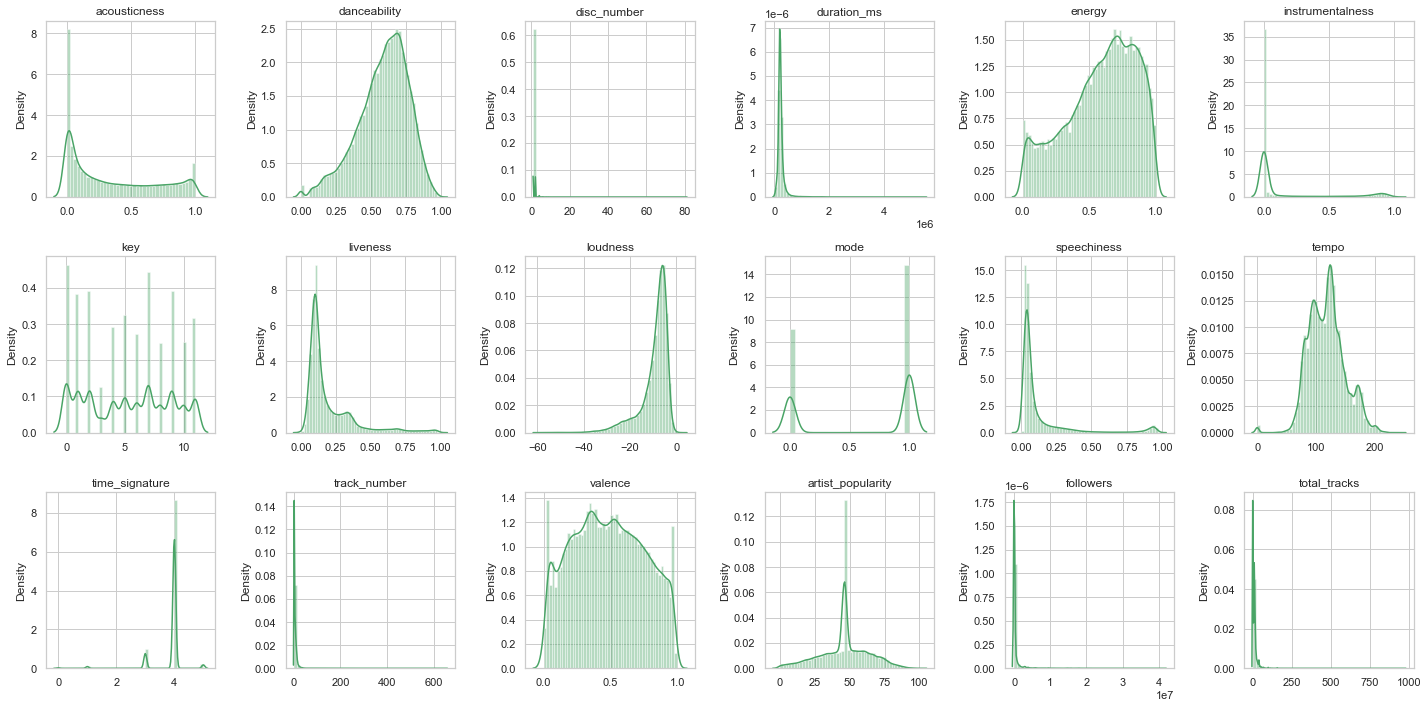

In [173]:
#Visualizamos la distribución de las variables
columns = 6

fig, axes = plt.subplots(len(variables_float) //columns, columns, figsize=(20,10))

for current_idx, variable in enumerate(variables_float):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(data[variable], ax=axes[i][j],color='#49a466')
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()
plt.show()

### 4.2 Analisis de outliers


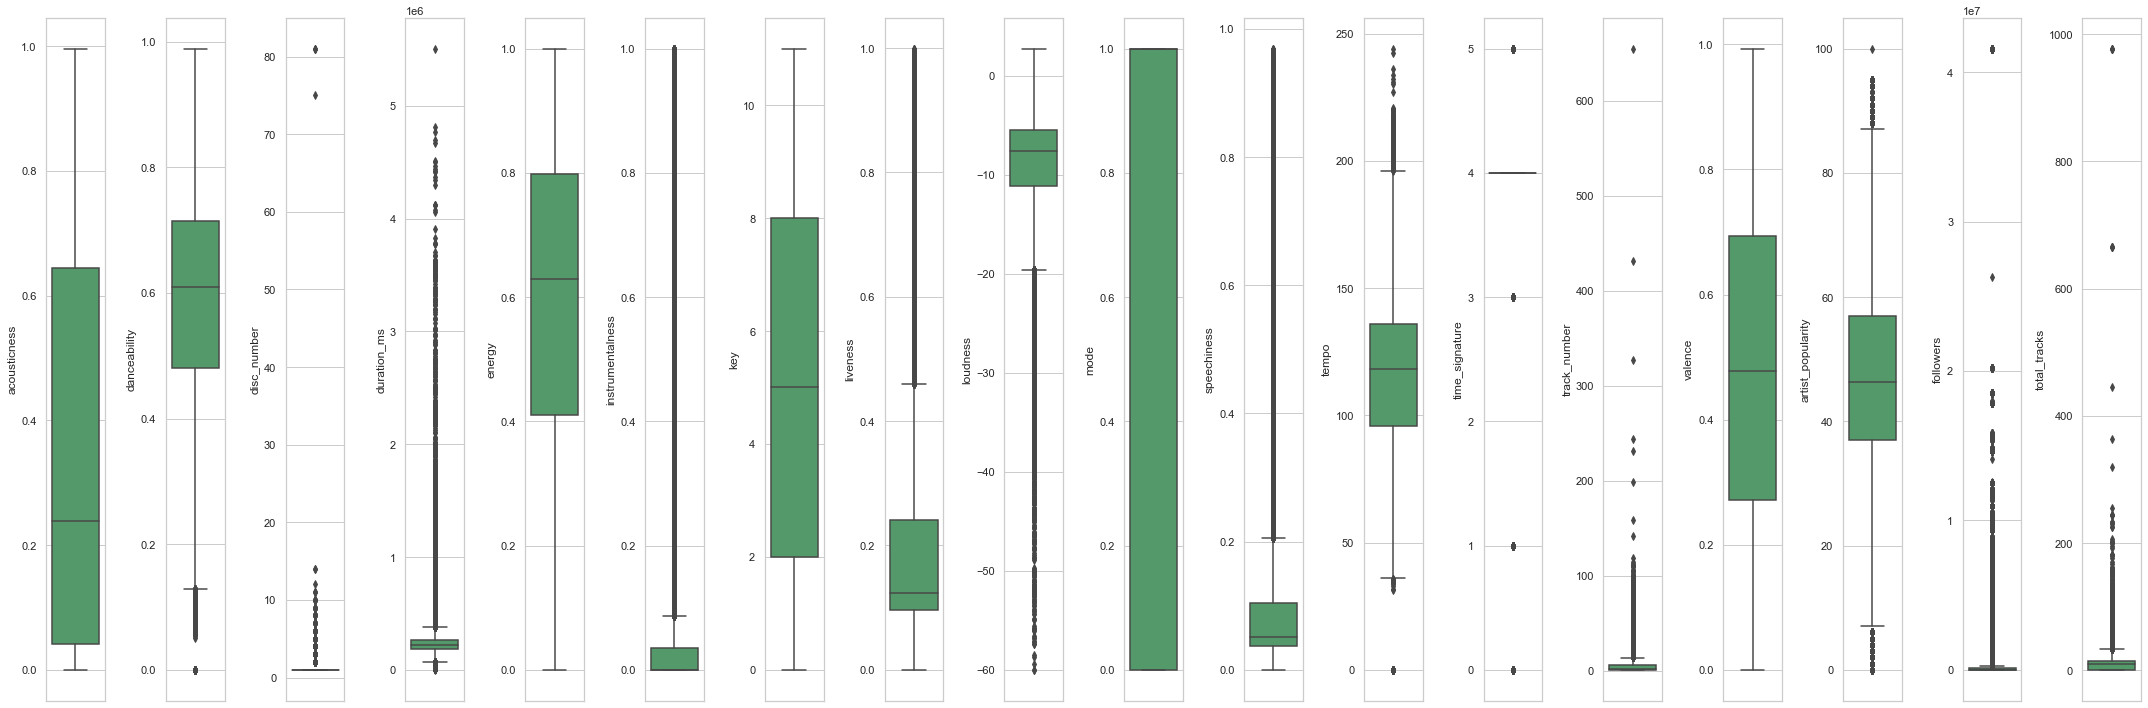

In [174]:
fig, axes = plt.subplots(1, len(variables_float), figsize=(30,10))


for ax, variable in zip(axes, variables_float):
    ax = sns.boxplot( y=variable, data=data, ax=ax,color='#49a466')
plt.tight_layout()


Podemos ver que las siguientes variables tienen gran cantidad de outliers que vale la pena limpia: duration, disc number y track number. El resto tiene que ver con la distribucion no simetrica de las variables que describen, como por ejemplo, tener un sesgo hacia concentracion de canciones de baja instrumentalidad o de bajo tono acustico.




**Correcion de outliers**

In [175]:
#funcion que
def remove_outliers(df,name='feature'):
    #Store the 10th and 90th percentile 
    q10,q90=np.percentile(df[name],10),np.percentile(df[name],90)
    #Calculate the Interquartile range
    iqr_cut=1.5*(q90-q10)
    #Create variable of lower and upper cut
    lower,upper=q10-iqr_cut,q90+iqr_cut
    #Remove the outliers
    df=df[(df[name] >= lower) & (df[name] <= upper)]
    return df
    return df

In [176]:
#funcion que
def remove_outliers2(df,name='feature'):
    #Store the 5th and 95th percentile 
    q5,q95=np.percentile(df[name],5),np.percentile(df[name],95)
    #Calculate the Interquartile range
    iqr_cut=1.5*(q95-q5)
    #Create variable of lower and upper cut
    lower,upper=q5-iqr_cut,q95+iqr_cut
    #Remove the outliers
    df=df[(df[name] >= lower) & (df[name] <= upper)]
    return df

In [177]:
data.columns

Index(['acousticness', 'available_markets_tracks', 'danceability',
       'disc_number', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo',
       'time_signature', 'track_number', 'valence', 'artist_popularity',
       'followers', 'genres', 'available_markets_albums', 'total_tracks',
       'popularity_cat', 'year', 'month', 'decade', 'album_type_album',
       'album_type_compilation', 'album_type_single'],
      dtype='object')

In [178]:
data=remove_outliers2(data,'disc_number')
len(data)

100035

In [179]:
data=remove_outliers(data,'duration_ms')
len(data)

98280

In [180]:
data3=remove_outliers2(data,'track_number')
len(data)

98280

In [181]:
len(data)

98280

In [182]:
### ANALISIS DE VARIABLES FLOAT post remover outliers
variables_float2 = ['acousticness','danceability','disc_number','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness',
                   'tempo','time_signature','track_number','valence','artist_popularity','followers','total_tracks']

C:\Users\Melisa\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



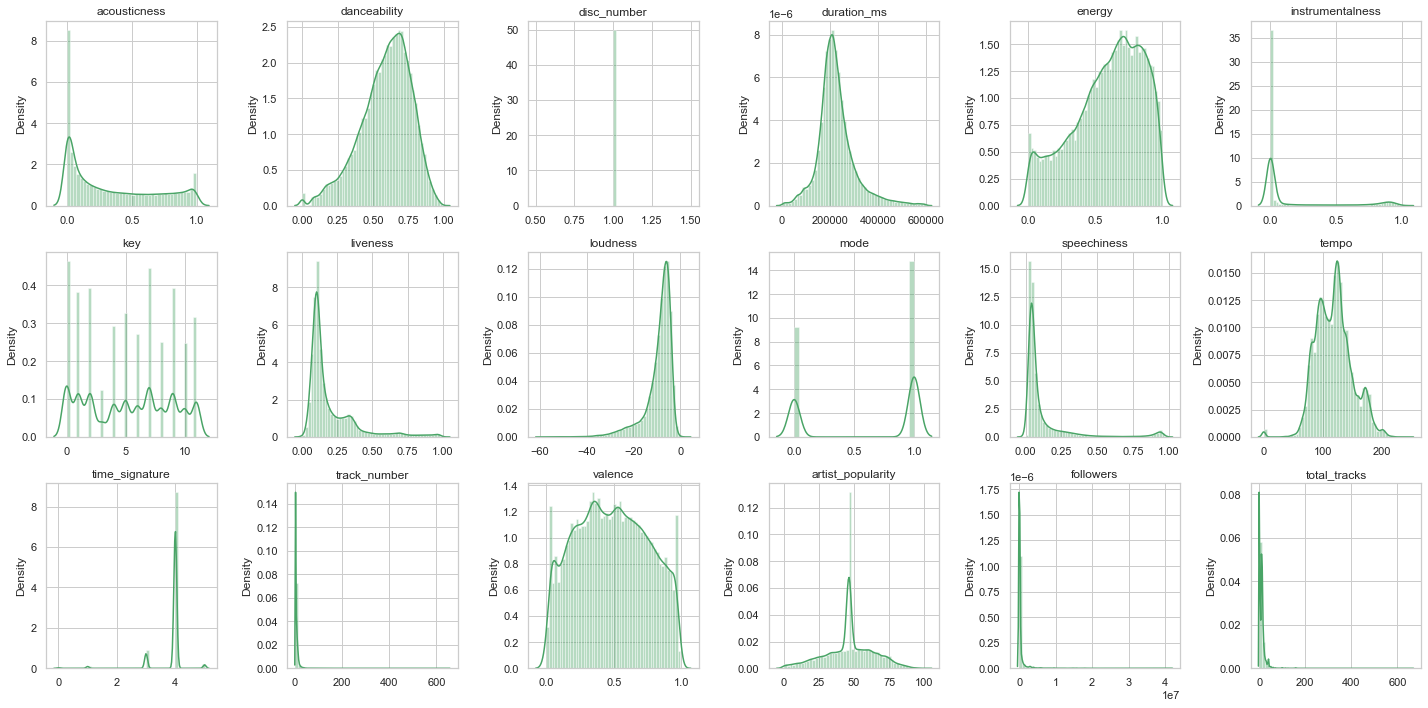

In [183]:
#Visualizamos la distribución de las variables post remover outliers
columns = 6

fig, axes = plt.subplots(len(variables_float2) //columns, columns, figsize=(20,10))

for current_idx, variable in enumerate(variables_float2):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(data[variable], ax=axes[i][j],color='#49a466')
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()
plt.show()

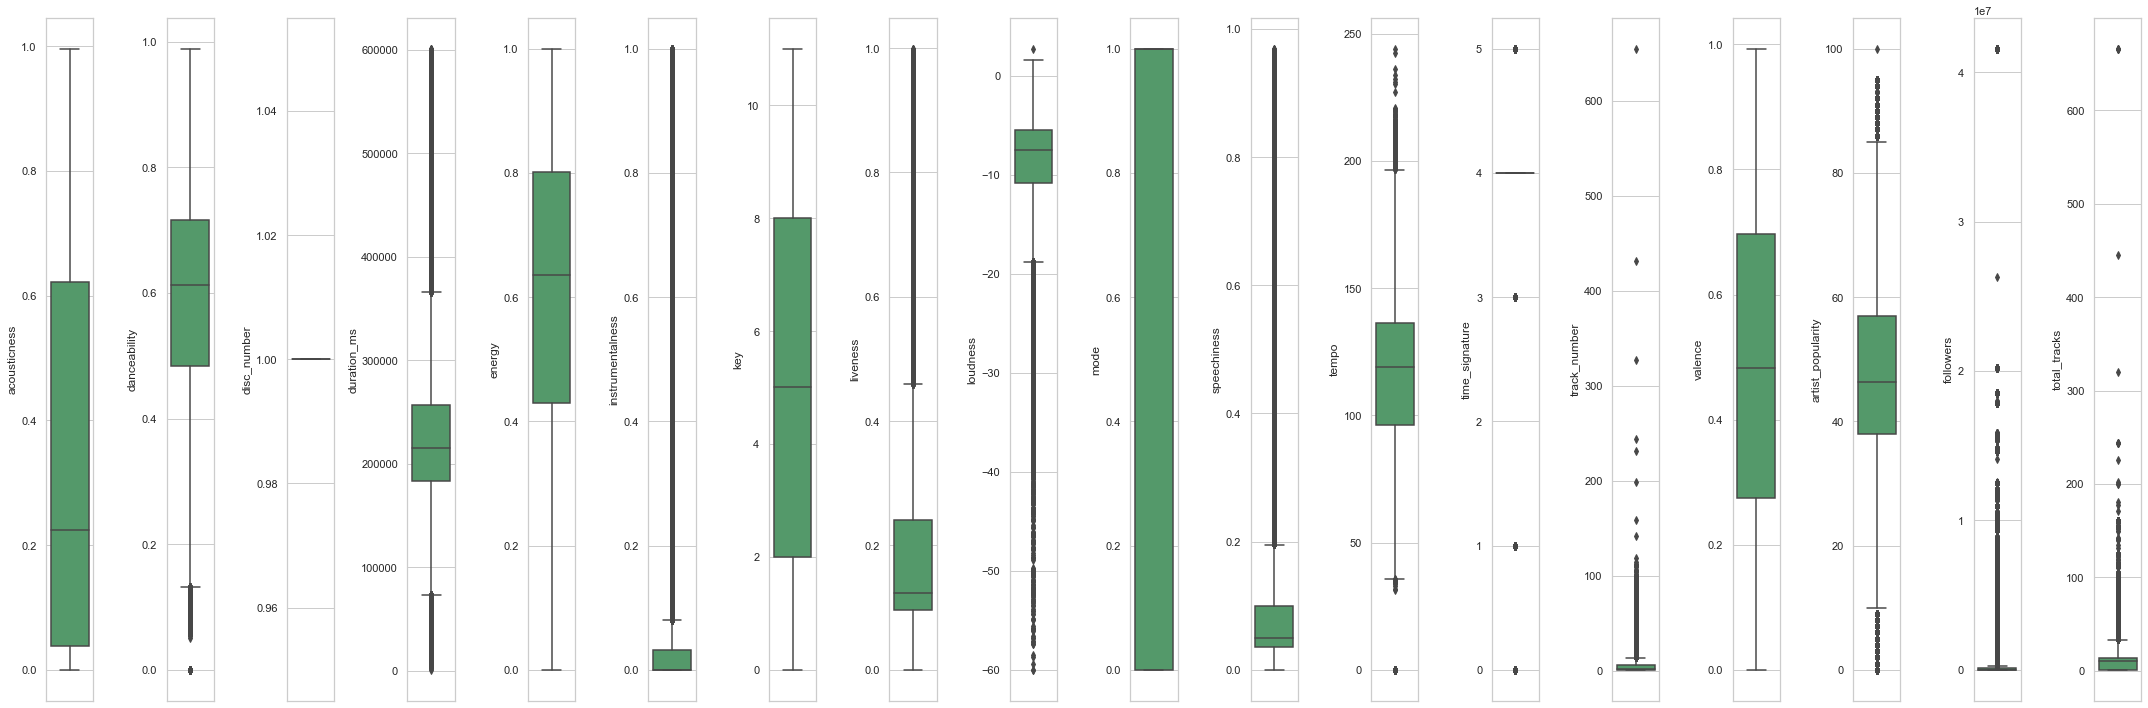

In [184]:
fig, axes = plt.subplots(1, len(variables_float2), figsize=(30,10))


for ax, variable in zip(axes, variables_float2):
    ax = sns.boxplot( y=variable, data=data, ax=ax,color='#49a466')
plt.tight_layout()

### 4.3 Analisis de correlación

In [185]:
print(data.shape)

(98280, 29)


In [186]:
data.head()

,acousticness,available_markets_tracks,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,...,genres,available_markets_albums,total_tracks,popularity_cat,year,month,decade,album_type_album,album_type_compilation,album_type_single
0,0.294,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.698,1.0,235584.0,0.606,0.000003,10.0,0.151,-7.447,...,['finnish indie'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",2,unknown,2018,5,2010,0,0,1
2,0.750,['GB'],0.466,1.0,492840.0,0.931,0.000000,4.0,0.938,-13.605,...,"['british comedy', 'comedy']",['GB'],12,unpopular,2008,12,2000,1,0,0
3,0.763,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.719,1.0,316578.0,0.126,0.000000,3.0,0.113,-20.254,...,"['german literature', 'reading']","['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",8,unknown,2005,1,2000,0,1,0
4,0.770,['GB'],0.460,1.0,558880.0,0.942,0.000000,7.0,0.917,-13.749,...,"['british comedy', 'comedy']",['GB'],12,unpopular,2008,12,2000,1,0,0
5,0.971,"['AE', 'AR', 'BH', 'BO', 'BR', 'CL', 'CO', 'CR...",0.367,1.0,183653.0,0.349,0.296000,11.0,0.633,-7.740,...,"['art pop', 'folk-pop', 'indie pop', 'indie ps...","['AE', 'AR', 'BH', 'BO', 'BR', 'CL', 'CO', 'CR...",10,popular,2017,9,2010,1,0,0


In [187]:
correlation = data.drop('disc_number', axis=1).corr(method="pearson")

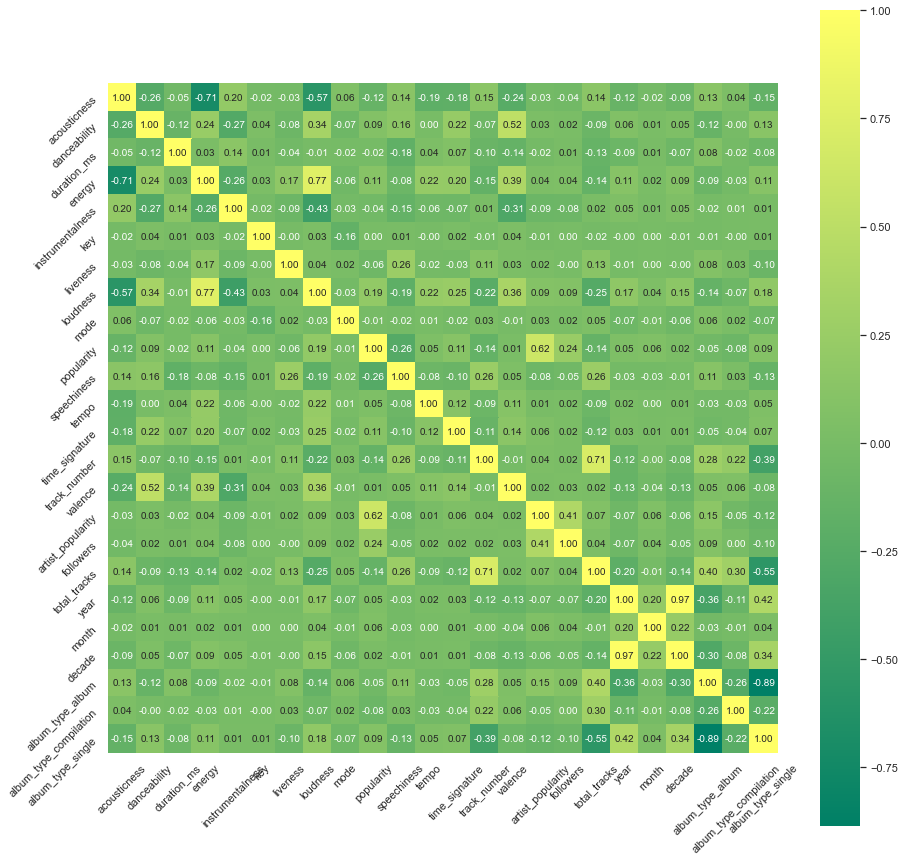

In [188]:
#HEATMAP
plt.figure(figsize=(15,15)) 

#Genero el mapa de calor
sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'summer') 

#Roto los ejes para que queden inclinados
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Veamos:
1. -0.72 entre acousticness y energy
2. 0.52 entre danceability y valence
3. 0.78 loudness y energy
4. 0.72 entre artist_popularity y popularity
5. 0.97 entre year y decade
Las dos últimas correlaciones son bastante intuitivas, mientras que es bueno conocer las dos correlaciones primeras acerca de los audio features.

### 4.4 Analisis de Missing Values

In [189]:
#Nos fijamos cuales son esas filas
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
rows_with_NaN

,acousticness,available_markets_tracks,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,...,genres,available_markets_albums,total_tracks,popularity_cat,year,month,decade,album_type_album,album_type_compilation,album_type_single
10,0.1010,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.748,1.0,237667.0,0.666,0.000653,6.0,0.0976,-6.094,...,NaN,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,popular,2018,9,2010,0,0,1
59,0.1480,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.790,1.0,174189.0,0.722,0.000000,1.0,0.1720,-4.149,...,NaN,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,popular,2018,9,2010,0,0,1
64,0.2880,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.676,1.0,229956.0,0.719,0.000000,1.0,0.1360,-4.847,...,NaN,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,popular,2018,12,2010,0,0,1
76,0.0989,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.749,1.0,191592.0,0.479,0.003200,0.0,0.3760,-4.789,...,NaN,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,popular,2019,3,2010,0,0,1
77,0.1190,"['AD', 'FR', 'MC']",0.594,1.0,164751.0,0.907,0.000002,1.0,0.0593,-2.692,...,NaN,"['AD', 'FR', 'MC']",1,unpopular,2018,5,2010,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101923,0.4710,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.594,1.0,213459.0,0.680,0.000000,1.0,0.0634,-5.228,...,NaN,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,hit,2018,8,2010,0,0,1
101926,0.2220,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.476,1.0,217964.0,0.594,0.000000,8.0,0.2520,-10.852,...,NaN,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,unpopular,2018,5,2010,0,0,1
101927,0.0084,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.751,1.0,214800.0,0.785,0.000370,7.0,0.0852,-5.895,...,NaN,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",1,unknown,2018,6,2010,0,0,1
101928,0.3210,"['AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO...",0.740,1.0,191767.0,0.675,0.000000,1.0,0.0861,-4.576,...,NaN,"['AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO...",1,unpopular,2018,3,2010,0,0,1


Por ahora no tiene sentido dropear estas filas, ya que tambien contienen 
información sobre otras variables de interés, por lo tanto, conservamos estas 23k filas y lo tendremos en cuenta a la hora de realizar los análisis con estas variables

## 5. ANÁLISIS UNIVARIADO

### 5.1 Análisis de la variable target: 'popularity_cat'

In [190]:
data['popularity_cat']

0           unknown
2         unpopular
3           unknown
4         unpopular
5           popular
            ...    
101934    unpopular
101935      popular
101936          hit
101937          hit
101938    unpopular
Name: popularity_cat, Length: 98280, dtype: object

In [191]:
print("Cantidad de tracks en cada categoría")
data.groupby(by= "popularity_cat").size()

Cantidad de tracks en cada categoría


popularity_cat
hit          23410
popular      24581
unknown      24338
unpopular    25951
dtype: int64

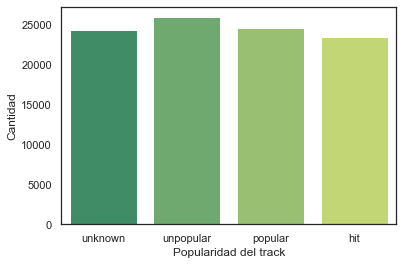

In [192]:
sns.set_theme(style="white")
ax = sns.countplot(x="popularity_cat", data=data, palette='summer')
ax.set(xlabel='Popularidad del track', ylabel='Cantidad')
plt.show()

#### ANALISIS: La cantidad de canciones se encuentra repartida casi de manera uniforme en las cuatro categorías de popularidad, con "popular" y "hit" siendo las categorias con menos cantidad de canciones.
*Esto es importante, se dice que la variable target esta balanceada*.

### 5.2 Análisis de la popularidad del artista

In [193]:
print("Cantidad de puntuaciones de popularidad")
data['artist_popularity'].count()

Cantidad de puntuaciones de popularidad


98280

In [194]:
print("Suma de la popularidad de todos los artistas")
data['artist_popularity'].sum()

Suma de la popularidad de todos los artistas


4574483.7619757205

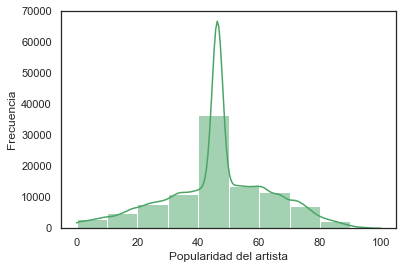

In [195]:
ax= sns.histplot(data['artist_popularity'], bins= 10, kde= True, color='#49a466')
ax.set(xlabel='Popularidad del artista', ylabel='Frecuencia')
plt.show()

#### ANALISIS: La mayor frecuencia de popularida de artistas se encuentra en el medio de la distribución y se observa que la cantidad de artistas muy populares es la frecuencia más baja de todas y que hay un gran porcentaje de artistas poco conocidos (< 20)

### 5.3 Análisis de año y mes de lanzamiento de las canciones

In [196]:
#minimo y maximo de año
print("Año mínimo:", data['year'].min())
print("Año máximo:", data['year'].max())

Año mínimo: 1886
Año máximo: 2019


In [197]:
#Agrupamos el año de lanzamiento en decadas
data['decade'] = (data['year']//10)*10
data['decade']
print("Década mínima:", data['decade'].min())
print("Década máxima:", data['decade'].max())

Década mínima: 1880
Década máxima: 2010


#### 5.3.1 Analizamos por década

In [198]:
print("Cantidad total de canciones por década")
tracks_per_decade= data[['total_tracks','decade']].groupby('decade').count()
tracks_per_decade

Cantidad total de canciones por década


,total_tracks
decade,
1880,1
1920,4
1930,12
1940,13
1950,326
1960,832
1970,1569
1980,2232
1990,5330


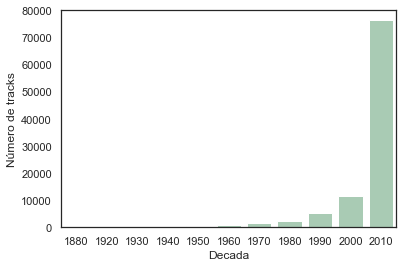

In [199]:
sns.set_theme(style="white")
ax = sns.countplot(x="decade", data=data, color='#a3d1b2ff')
ax.set(xlabel='Decada', ylabel="Número de tracks")
plt.show()

#### ANALISIS: La cantidad de canciones ha hido aumentando considerablemente a través de los años, siendo la última década la que mayor aporte de canciones tuvo. Hay pocas canciones lanzanas antes de la decada de los 50 en spotify

##### 5.3.1.1 Analizamos las decadas que tienen menos tracks (desde el año 1880 a 1950)

In [200]:
tracks_880_50 = data[['total_tracks','decade']].loc[data['decade'] <=1950]
tracks_880_50

,total_tracks,decade
226,15,1950
254,18,1950
263,27,1950
268,27,1950
273,24,1950
...,...,...
101524,21,1950
101532,21,1950
101534,21,1950
101536,21,1950


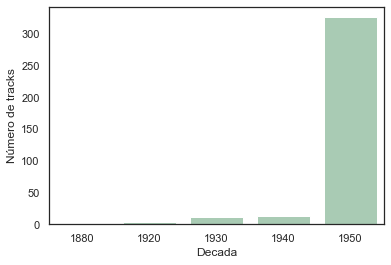

In [201]:
sns.set_theme(style="white")
ax = sns.countplot(x="decade", data=tracks_880_50, color='#a3d1b2ff')
ax.set(xlabel='Decada', ylabel="Número de tracks")
plt.show()

#### ANALISIS: En 1950 se encuentra la mayoría de tracks lanzados. Es despreciable la cantidad de tracks de los años anteriores al mismo. En general esta cantidad de tracks es despreciable comparada con la cantidad de tracks de los años posteriores a 1950.




#### 5.3.1 Analizamos por mes de lanzamiento

In [202]:
print("Cantidad total de canciones lanzadas por mes")
tracks_per_month=data[['total_tracks','month']].groupby('month').count()
tracks_per_month

Cantidad total de canciones lanzadas por mes


,total_tracks
month,
1,17492
2,9897
3,9968
4,5505
5,6208
6,6415
7,5757
8,6275
9,8100


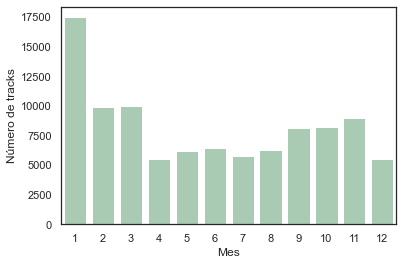

In [203]:
sns.set_theme(style="white")
ax = sns.countplot(x="month", data=data, color='#a3d1b2ff')
ax.set(xlabel='Mes', ylabel="Número de tracks")
plt.show()

#### ANALISIS: Aquellos que poseen mas cantidad de canciones son enero a marzo  y se ve un aumento en el lanzamiento de canciones en los meses de octubre y noviembre

### 4.4 Análisis de las variables 'Audio features'

In [204]:
audio_features= data[["acousticness", "liveness", "loudness", "danceability",
                      "energy", "instrumentalness", "duration_ms",'key','speechiness','tempo','valence']]

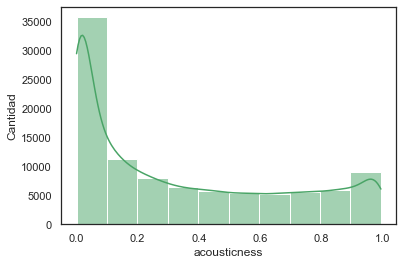

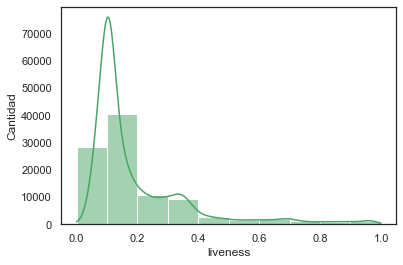

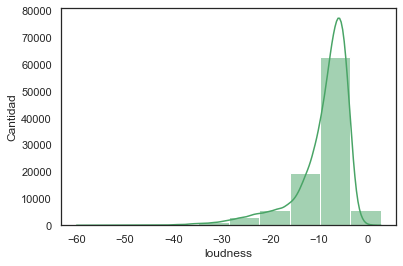

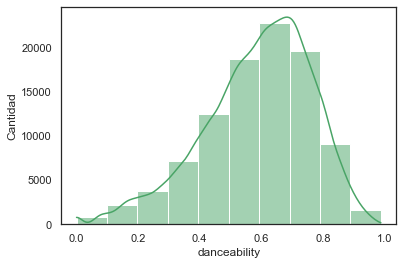

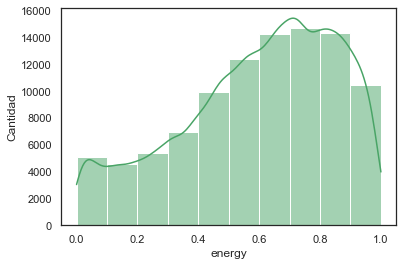

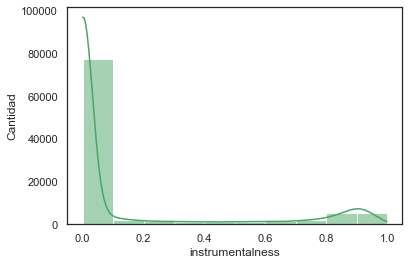

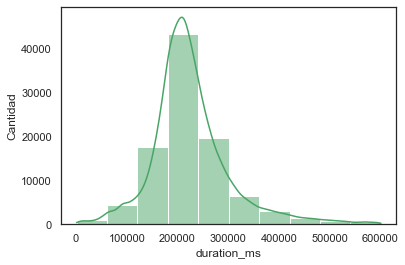

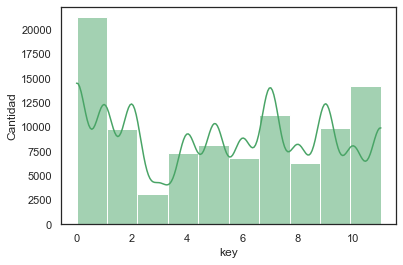

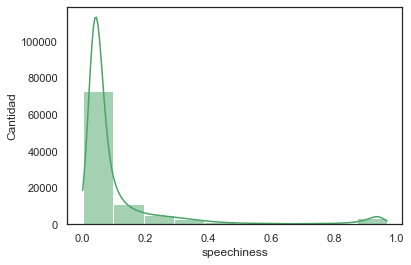

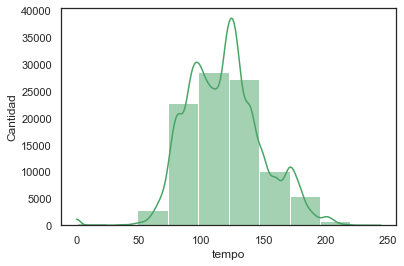

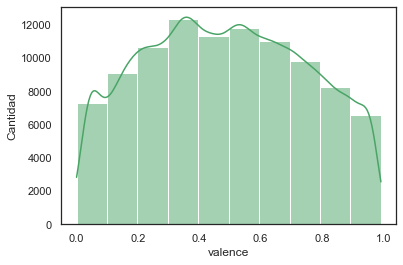

In [205]:
for i in audio_features:
    
    draw= sns.histplot(data[i], bins= 10, kde= True, color='#49a466') 
    draw.set(ylabel='Cantidad')
    plt.show()

ANALISIS POR VARIABLE:



*   Acousticness: representa del 0 al 1 la probabilidad de que el track sea una versión acústica. La mayoría de tracks no lo son; en promedio la probabilidad de que un track sea o no acústico es la misma (valores del medio).
*   Liveness: detecta la presencia de una audiencia en el track. Un valor de 0.8 es considerado como un track con alta probabilidad de ser tocado en vivo. La mayoria de los tracks no tienen audiencia o tienen muy baja probabilidad de ser tocados en vivo.
*   Loudness: el promedio de la amplitud del sonido del track, en dB (el "volumen" del track). La escala es negativa porque se toma como presión de referencia, para calcular los dB, la máxima intensidad que puede percibir el oído humano. La mayoría de los tracks en general manejar un alto volumen.
*   Danceability: cuán "bailable" es el track, según variables como ritmo, tempo, BPM. Va entre 0 y 1, siendo 1 el más bailable y 0 el menos bailable. La mayoria de los tracks tienen son más bailables que no, ya que el histograma tiene un sesgo hacia la izquierda.
*   Energy: mide la percepción de intensidad y actividad del track, del 0 al 1. Los tracks con mayor energía son rápidos, de volumen alto y con ruido. La mayoría de los tracks tienen alta energía (mayor que 0.5)
*   Instrumentalness: es la probabilidad de que el track no contenga vocales, entre 0 y 1. Sonidos como "ah" u "oh" no son considerados vocales. Valores arriba de 0.5 tienen gran probabilidad de ser sólo instrumentales. Hay una clara predominancia de tracks vocales.
*   Duration_ms: duración del track en milisegundos. El eje de las absisas está en notación científica (1e10). La mayoría de los tracks dura entre 0 y 500.000 milisegundos aproximadamente (alrededor de 8 minutos).
*   Key: nota en la cual está escrito el track. Se usa como escala el Pitch Class https://davidkulma.com/musictheory/integers. Cuando no se encuentra ninguna key, el valor es -1. La mayoria de los tracks están escritos en C o C#.
*   Speechiness: mide la presencia de vocales en el track, entre 0 y 1. Valores por arriba de 0.66 sean probablemente tracks sólo de vocales. Valores por debajo de 0.33 representan tracks que no tienen o tienen muy pocas vocales; la mayoría de los tracks son de este tipo.
*   Tempo: el tiempo promedio de los tracks, medido en BPM. La mayoría de los tracks tienen entre 75 y 150 BPM, con muy pocos tracks de más de 200 BPM y menos de 75 BPM.
*   Valence: medida de la "felicidad" de una canción, entre 0 y 1. Los tracks felices suenan eufóricos, animados. La distribución de todos los tracks es bastante regular; no hay una marcada tendencia de mayor o menor felicidad.



## 6. ANALISIS BIVARIADO

In [206]:
data.dtypes

acousticness                float64
available_markets_tracks     object
danceability                float64
disc_number                 float64
duration_ms                 float64
energy                      float64
instrumentalness            float64
key                         float64
liveness                    float64
loudness                    float64
mode                        float64
popularity                  float64
speechiness                 float64
tempo                       float64
time_signature              float64
track_number                float64
valence                     float64
artist_popularity           float64
followers                   float64
genres                       object
available_markets_albums     object
total_tracks                  int64
popularity_cat               object
year                          int64
month                         int64
decade                        int64
album_type_album              uint8
album_type_compilation      

### 6.1 Analisis de los audio features

In [207]:
var_audio_features= ["acousticness", "liveness", "loudness", "danceability",
                      "energy", "instrumentalness", "duration_ms",'key','speechiness','tempo','valence']

<AxesSubplot:xlabel='valence', ylabel='popularity_cat'>

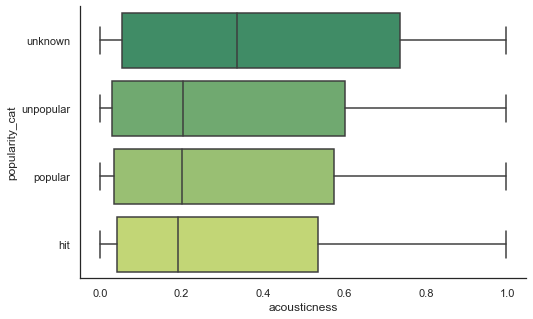

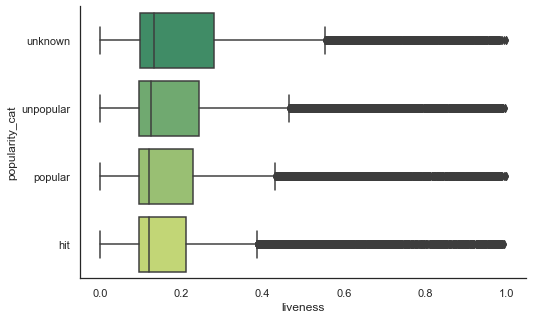

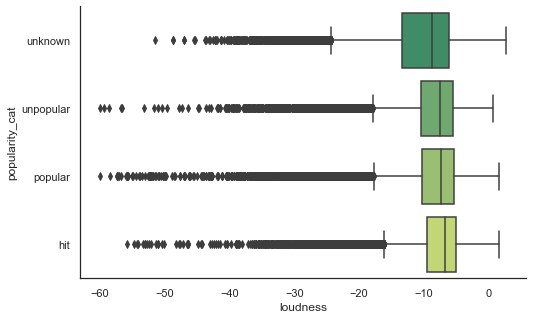

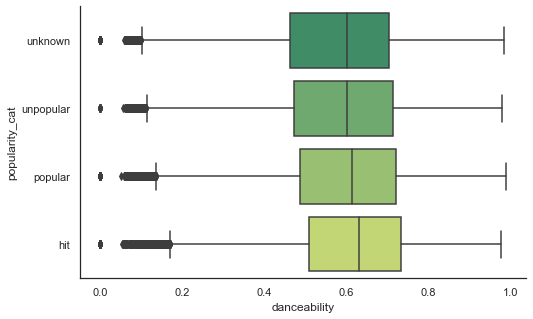

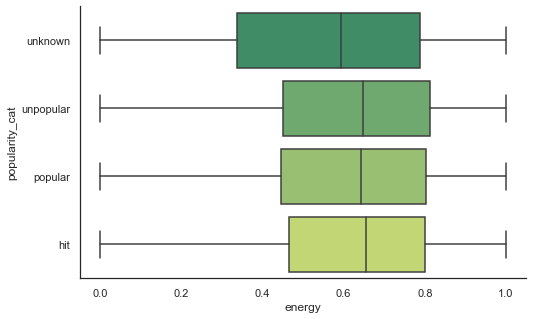

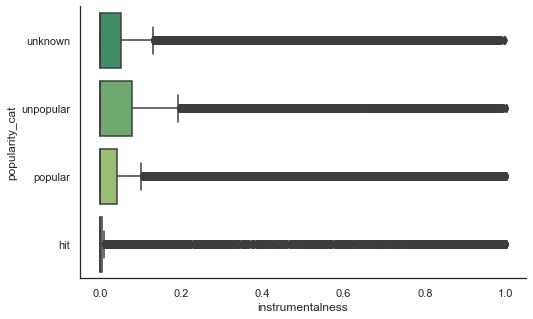

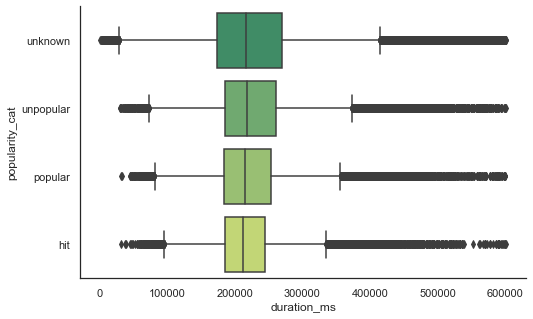

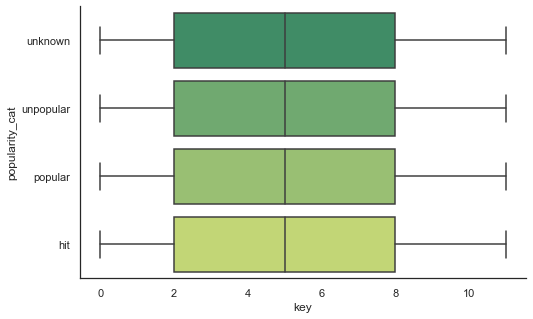

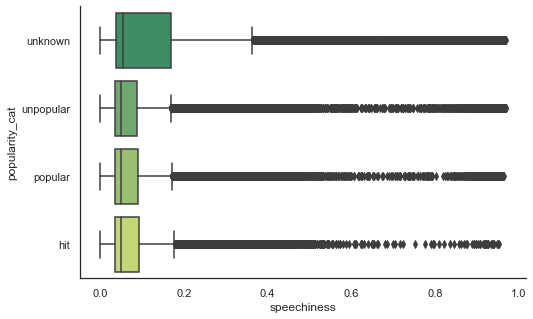

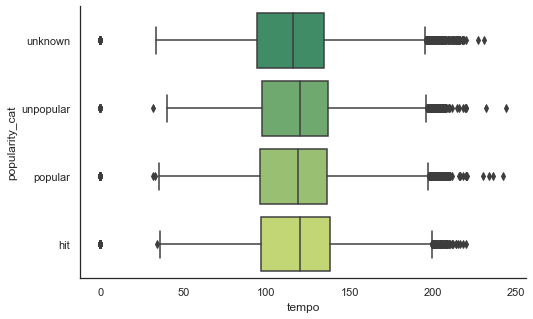

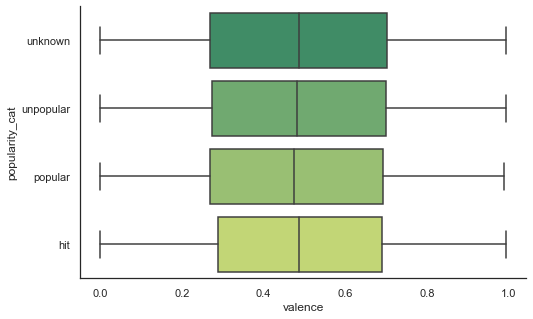

In [208]:
f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[0],data=data, orient="h", palette="summer")
#acousticness no posee outliers


f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[1],data=data, orient="h", palette="summer")
#liveness posee outliers mayores al maximo de la distribucion

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[2],data=data, orient="h", palette="summer")
#loudness posee outliers menores al minimo de la distribucion


f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[3],data=data, orient="h", palette="summer")
#danceability posee outliers mayores al maximo de la distribucion

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[4],data=data, orient="h", palette="summer")
#energy no posee outliers

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[5],data=data, orient="h", palette="summer")
#instrulmentalness posee outliers mayores al maximo de la distribucion

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[6],data=data, orient="h", palette="summer")
#duration_ms posee outliers mayores al maximo de la distribucion

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[7],data=data, orient="h", palette="summer")
#key no posee outliers

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[8],data=data, orient="h", palette="summer")
##speechiness posee outliers mayores al maximo de la distribucion

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[9],data=data, orient="h", palette="summer")
#tempo posee outliers mayores al maximo de la distribucion

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[10],data=data, orient="h", palette="summer")
#valence no posee outliers

### 6.2 Analisis del artista

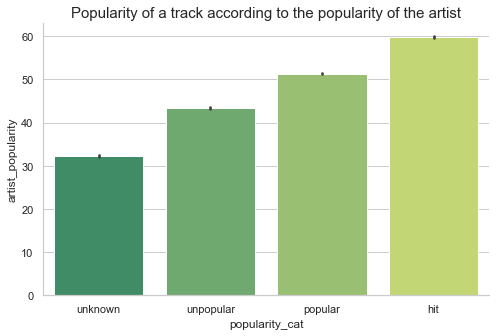

In [209]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.barplot(
    data=data,
    y='artist_popularity', x='popularity_cat',  palette="summer").set_title('Popularity of a track according to the popularity of the artist',fontsize=15)
plt.show()

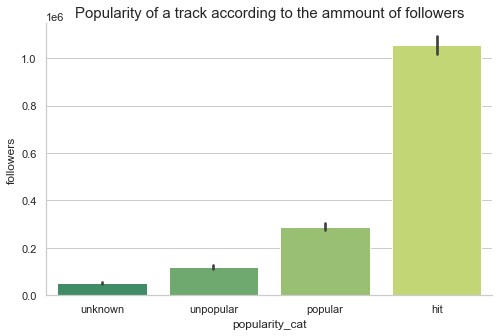

In [210]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.barplot(
    data=data,
    y='followers', x='popularity_cat',  palette="summer").set_title('Popularity of a track according to the ammount of followers',fontsize=15)
plt.show()

## 7. ANALISIS MULTIVARIADO

Vamos a trabajar principalmente sobre las variables relacionados a los features de audio y relacionarlas con la popularidad y sus rango de popularidad.

Primero, las escalamos a que esten todas en una misma escala y dibujamos un radar por rango de popularidad (variable target) para ver visualmente como se comporta cada categoria.


In [211]:
data.columns

Index(['acousticness', 'available_markets_tracks', 'danceability',
       'disc_number', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo',
       'time_signature', 'track_number', 'valence', 'artist_popularity',
       'followers', 'genres', 'available_markets_albums', 'total_tracks',
       'popularity_cat', 'year', 'month', 'decade', 'album_type_album',
       'album_type_compilation', 'album_type_single'],
      dtype='object')

### 7.1 GRAFICO DE RADAR

In [212]:
# primero armo la audiofeatures full
audio_features_full= data[["acousticness", "liveness", "loudness", "danceability", "energy", "instrumentalness", "duration_ms"
                     , "key", "speechiness", "valence", "tempo",]]

In [213]:
audio_features_full

,acousticness,liveness,loudness,danceability,energy,instrumentalness,duration_ms,key,speechiness,valence,tempo
0,0.294000,0.1510,-7.447,0.698,0.606,0.000003,235584.0,10.0,0.0262,0.6220,115.018
2,0.750000,0.9380,-13.605,0.466,0.931,0.000000,492840.0,4.0,0.9440,0.0850,79.565
3,0.763000,0.1130,-20.254,0.719,0.126,0.000000,316578.0,3.0,0.9380,0.5330,112.822
4,0.770000,0.9170,-13.749,0.460,0.942,0.000000,558880.0,7.0,0.9430,0.0906,81.260
5,0.971000,0.6330,-7.740,0.367,0.349,0.296000,183653.0,11.0,0.0268,0.1920,81.850
...,...,...,...,...,...,...,...,...,...,...,...
101934,0.005640,0.0875,-4.578,0.602,0.904,0.000000,178893.0,11.0,0.0327,0.7870,130.186
101935,0.000406,0.2420,-5.561,0.177,0.823,0.005370,213133.0,7.0,0.0604,0.3630,184.260
101936,0.004510,0.0606,-6.614,0.539,0.883,0.000001,226107.0,6.0,0.0653,0.4060,118.043
101937,0.333000,0.0899,-6.426,0.716,0.748,0.000007,224133.0,9.0,0.1510,0.7600,110.015


In [214]:
#Aplicamos el MinMaxScaler para escalar las variables de 0 a 1
x = audio_features_full.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
audio_norm = pd.DataFrame(x_scaled, columns= audio_features_full.columns)

In [215]:
audio_norm

,acousticness,liveness,loudness,danceability,energy,instrumentalness,duration_ms,key,speechiness,valence,tempo
0,0.295181,0.151151,0.837912,0.705763,0.606,0.000003,0.390816,0.909091,0.027038,0.626385,0.471318
1,0.753012,0.938939,0.739728,0.471183,0.931,0.000000,0.819687,0.363636,0.974200,0.085599,0.326039
2,0.766064,0.113113,0.633715,0.726997,0.126,0.000000,0.525841,0.272727,0.968008,0.536757,0.462319
3,0.773092,0.917918,0.737432,0.465116,0.942,0.000000,0.929782,0.636364,0.973168,0.091239,0.332985
4,0.974900,0.633634,0.833240,0.371082,0.349,0.296000,0.304242,1.000000,0.027657,0.193353,0.335403
...,...,...,...,...,...,...,...,...,...,...,...
98275,0.005663,0.087588,0.883656,0.608696,0.904,0.000000,0.296307,1.000000,0.033746,0.792548,0.533473
98276,0.000408,0.242242,0.867983,0.178969,0.823,0.005370,0.353388,0.636364,0.062332,0.365559,0.755056
98277,0.004528,0.060661,0.851193,0.544995,0.883,0.000001,0.375017,0.545455,0.067389,0.408862,0.483713
98278,0.334337,0.089990,0.854191,0.723964,0.748,0.000007,0.371726,0.818182,0.155831,0.765358,0.450816


In [216]:
#las audio features escaladas para estar en rango 0 a 1

En popularidad, los valores para dividir en 4 categorias son:


*   Unknown: de 0.0 a 29.0
*   Unpopular: de 29.0 a 41.0 
*   Popular: de 42.0 52.0
*   Hit: de 52.0 para arriba



In [217]:
#separamos los datasets para hacer un radar de cada rango de popularidad que venimos trabajando
audio_norm["popularity_cat"]= data["popularity_cat"] #Traemos de nuevo la columna popularity cat del dataser original
unkn= audio_norm.loc[audio_norm.popularity_cat == "unknown"]
unpo= audio_norm.loc[audio_norm.popularity_cat=="unpopular"]
popu= audio_norm.loc[audio_norm.popularity_cat=="popular"]
hit= audio_norm.loc[audio_norm.popularity_cat=="hit"]

In [218]:
#Graficamos los radares para cada rango de popularidad
import plotly.graph_objects as go

categories = ["acousticness", "liveness", "loudness", "danceability", "energy", "instrumentalness", "duration_ms", "key", "speechiness", "valence", "tempo"]

fig1 = go.Figure()
fig2 = go.Figure()
fig3 = go.Figure()
fig4 = go.Figure()

fig1.add_trace(go.Scatterpolar(
      r=unkn.mean().values,
      theta=categories,
      fill='toself', fillcolor='#249266',
      name='Unknown'
)).update_traces(marker=dict(color='#249266'))

fig2.add_trace(go.Scatterpolar(
      r=unpo.mean().values,
      theta=categories,
      fill='toself', fillcolor='#6db666',
      name='Unpopular'
)).update_traces(marker=dict(color='#6db666'))

fig3.add_trace(go.Scatterpolar(
      r=popu.mean().values,
      theta=categories,
      fill='toself', fillcolor='#b6db66',
      name='Popular'
)).update_traces(marker=dict(color='#b6db66'))

fig4.add_trace(go.Scatterpolar(
      r=hit.mean().values,
      theta=categories,
      fill='toself', fillcolor='#dbed66',
      name='Hit'
)).update_traces(marker=dict(color='#dbed66'))

fig1.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False,
  title="Category: Unknown Songs"
)
fig2.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False,
  title="Category: Unpopular Songs"
)
fig3.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False,
  title="Category: Popular Songs"
)
fig4.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False,
  title="Category: Hit Songs"
)
fig1.show()
fig2.show()
fig3.show()
fig4.show()

Podemos concluir que la estructura promedio de la cancion en terminos de audio features, es similar en todos los rangos de popularidad.

### 7.2 Distribuciones

In [219]:
#vamos a rearmar el dataframe anterior pero sumando popularidad normalizada para el analisis de la distribucion
df_distribuciones= data[["acousticness", "liveness", "loudness", "danceability", "energy", "instrumentalness", "duration_ms"
                     , "key", "speechiness", "valence", "tempo","popularity"]]

In [220]:
#Aplicamos el MinMaxScaler
x = df_distribuciones.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_distribuciones = pd.DataFrame(x_scaled, columns= df_distribuciones.columns)

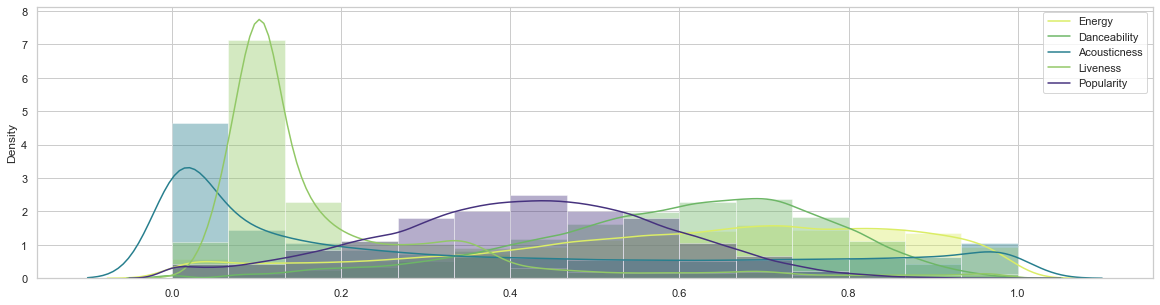

In [221]:
plt.figure(figsize=(20,5))
sns.distplot(df_distribuciones['energy'],bins=15, color='#dbed66')
sns.distplot(df_distribuciones['danceability'],bins=15, color= '#6db666')
sns.distplot(df_distribuciones['acousticness'],bins=15,color='#277f8e')
sns.distplot(df_distribuciones['liveness'],bins=15, color='#92c866')
sns.distplot(df_distribuciones['popularity'],bins=15,color='#46327e')
plt.legend(labels=['Energy', 'Danceability', 'Acousticness','Liveness','Popularity'])
plt.xlabel(None)
plt.show()

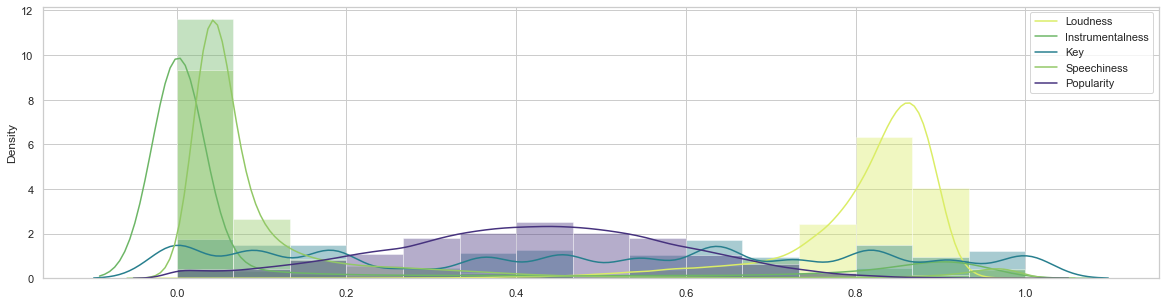

In [222]:
plt.figure(figsize=(20,5))
sns.distplot(df_distribuciones['loudness'],bins=15, color='#dbed66')
sns.distplot(df_distribuciones['instrumentalness'],bins=15, color= '#6db666')
sns.distplot(df_distribuciones['key'],bins=15,color='#277f8e')
sns.distplot(df_distribuciones['speechiness'],bins=15, color='#92c866')
sns.distplot(df_distribuciones['popularity'],bins=15,color='#46327e')
plt.legend(labels=['Loudness', 'Instrumentalness', 'Key','Speechiness','Popularity'])
plt.xlabel(None)
plt.show()

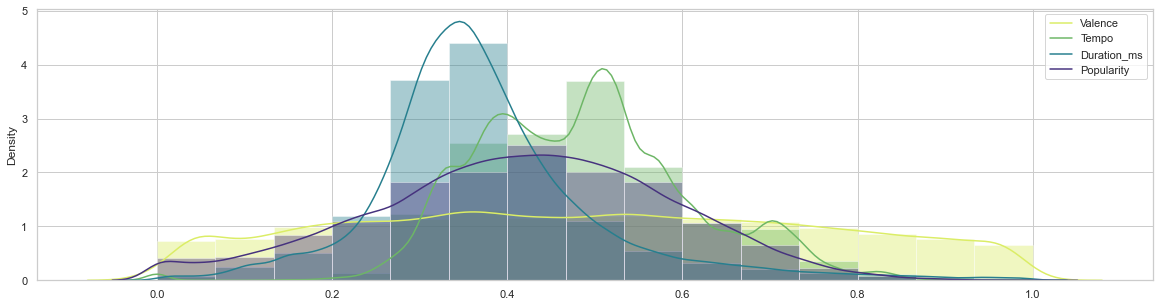

In [223]:
plt.figure(figsize=(20,5))
sns.distplot(df_distribuciones['valence'],bins=15, color='#dbed66')
sns.distplot(df_distribuciones['tempo'],bins=15, color= '#6db666')
sns.distplot(df_distribuciones['duration_ms'],bins=15,color='#277f8e')
sns.distplot(df_distribuciones['popularity'],bins=15,color='#46327e')
plt.legend(labels=['Valence', 'Tempo', 'Duration_ms','Popularity'])
plt.xlabel(None)
plt.show()

## 8. PRINCIPAL COMPONENT ANALYSIS

Vamos a reducir la dimensionalidad de las variables consideradas audiofeatures

In [224]:
#variables audiofeatures
print(var_audio_features)


['acousticness', 'liveness', 'loudness', 'danceability', 'energy', 'instrumentalness', 'duration_ms', 'key', 'speechiness', 'tempo', 'valence']


In [225]:
#dataframe
audio_features_full.head()

,acousticness,liveness,loudness,danceability,energy,instrumentalness,duration_ms,key,speechiness,valence,tempo
0,0.294,0.151,-7.447,0.698,0.606,0.000003,235584.0,10.0,0.0262,0.6220,115.018
2,0.750,0.938,-13.605,0.466,0.931,0.000000,492840.0,4.0,0.9440,0.0850,79.565
3,0.763,0.113,-20.254,0.719,0.126,0.000000,316578.0,3.0,0.9380,0.5330,112.822
4,0.770,0.917,-13.749,0.460,0.942,0.000000,558880.0,7.0,0.9430,0.0906,81.260
5,0.971,0.633,-7.740,0.367,0.349,0.296000,183653.0,11.0,0.0268,0.1920,81.850


In [226]:
#Separamos los features
x = data.loc[:, var_audio_features].values

In [227]:
#Separamos los target
y = data.loc[:,['popularity_cat']].values

In [228]:
#Estandarizamos los Features
x = StandardScaler().fit_transform(x)
x.shape

(98280, 11)

In [229]:
np.mean(x),np.std(x)

(-3.575454621799446e-17, 1.0)

### 8.1 Analisis con 2 componentes

La data original tiene 11 columnas, vamos a reducir a 2 dimensiones

In [230]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,-0.765054,0.052317
1,1.140882,2.038805
2,2.179379,3.223742
3,1.166553,1.655668
4,2.062482,0.607175


In [231]:
principalDf.tail()

,principal component 1,principal component 2
98275,-2.090408,-0.290492
98276,-0.826973,-1.776296
98277,-1.104567,-0.871336
98278,-1.213833,0.529214
98279,-1.669652,-0.595941


In [232]:
print('Variacion explicada por los componentes principales: {}'.format(pca.explained_variance_ratio_))

#El componente 1 representa el 28% de la información, mientras que el componente 2 solo el 13%

Variacion explicada por los componentes principales: [0.28167627 0.1436823 ]


In [233]:
#concatenamos el data frame con la columna popularity cat
finalDF = pd.concat([principalDf, data[['popularity_cat']]], axis = 1)
finalDF

,principal component 1,principal component 2,popularity_cat
0,-0.765054,0.052317,unknown
1,1.140882,2.038805,NaN
2,2.179379,3.223742,unpopular
3,1.166553,1.655668,unknown
4,2.062482,0.607175,unpopular
...,...,...,...
101934,NaN,NaN,unpopular
101935,NaN,NaN,popular
101936,NaN,NaN,hit
101937,NaN,NaN,hit


Un poco de variacion fue captada por los componentes principales, en especial con la categoria unknown, ya que se observan dos nubes de puntos diferenciadas entre unknown y las demás categorias. 

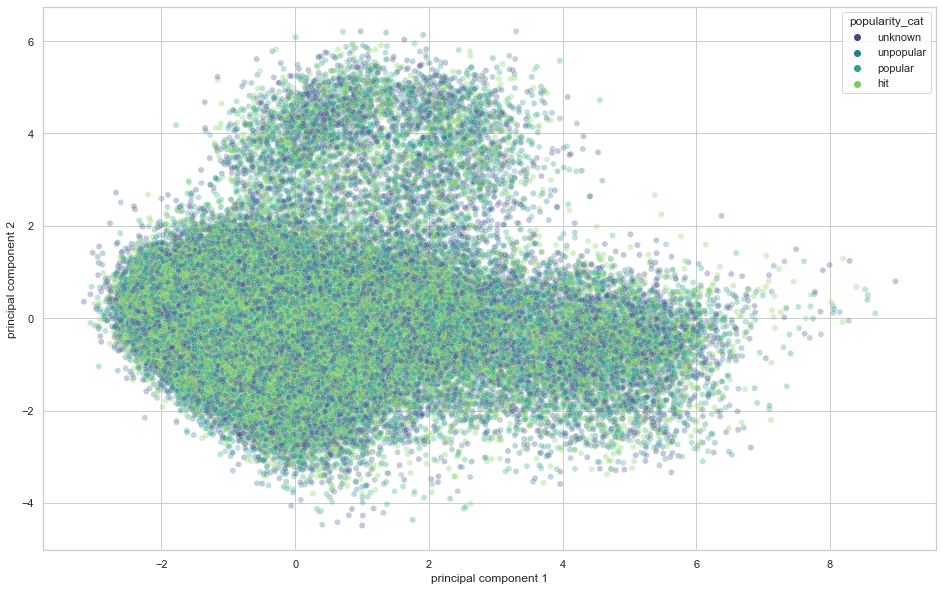

In [234]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="popularity_cat",
    palette=sns.color_palette("viridis", 4), #cambiamos de paleta para poder visualizar mejor
    data=finalDF,
    legend="full",
    alpha=0.3
)
plt.show()

Vemos que la reducción de la dimensionalidad no separa a las categorias

### 8.2 Analisis con 3 componentes

In [235]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
result = pd.DataFrame(data = principalComponents
             , columns=['PCA%i' % i for i in range(3)])

result.head()

,PCA0,PCA1,PCA2
0,-0.765054,0.052317,-0.799898
1,1.140882,2.038805,5.607582
2,2.179379,3.223742,0.047856
3,1.166553,1.655668,5.559254
4,2.062482,0.607175,1.837933


In [236]:
print('Variacion explicada por los componentes principales: {}'.format(pca.explained_variance_ratio_))

Variacion explicada por los componentes principales: [0.28167627 0.1436823  0.10706777]


In [237]:
data['popularity_cat']

0           unknown
2         unpopular
3           unknown
4         unpopular
5           popular
            ...    
101934    unpopular
101935      popular
101936          hit
101937          hit
101938    unpopular
Name: popularity_cat, Length: 98280, dtype: object

In [238]:
# Usamos las categorias para hacer el plot
my_color=data['popularity_cat']
my_color.replace({"unknown": 3, "unpopular": 2, "popular":1, "hit": 0}, inplace=True)
my_color

0         3
2         2
3         3
4         2
5         1
         ..
101934    2
101935    1
101936    0
101937    0
101938    2
Name: popularity_cat, Length: 98280, dtype: int64

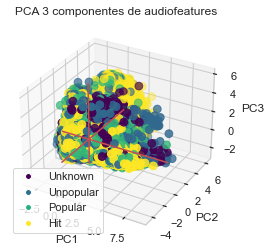

In [239]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='w',markerfacecolor='#440154FF', marker='o', label='Unknown'),
                   Line2D([0], [0], color='w',markerfacecolor='#2D708EFF', marker='o', label='Unpopular'),
                   Line2D([0], [0], color='w',markerfacecolor='#29AF7FFF', marker='o', label='Popular'),
                   Line2D([0], [0], color='w',markerfacecolor='#FDE725FF', marker='o', label='Hit')]




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'],c=my_color, cmap="viridis", s=60)
 
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA 3 componentes de audiofeatures")
plt.legend(labels=['Unknown', 'Unpopular', 'Popular','Hit'])
ax.legend(handles=legend_elements)
plt.show()


Volvemos la columna popularity_cat a sus valores originales

In [240]:
data['popularity_cat'].replace({3: "unknown" , 2:"unpopular", 1:"popular", 0:"hit"}, inplace=True)
data.head()

,acousticness,available_markets_tracks,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,...,genres,available_markets_albums,total_tracks,popularity_cat,year,month,decade,album_type_album,album_type_compilation,album_type_single
0,0.294,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.698,1.0,235584.0,0.606,0.000003,10.0,0.151,-7.447,...,['finnish indie'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",2,unknown,2018,5,2010,0,0,1
2,0.750,['GB'],0.466,1.0,492840.0,0.931,0.000000,4.0,0.938,-13.605,...,"['british comedy', 'comedy']",['GB'],12,unpopular,2008,12,2000,1,0,0
3,0.763,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.719,1.0,316578.0,0.126,0.000000,3.0,0.113,-20.254,...,"['german literature', 'reading']","['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",8,unknown,2005,1,2000,0,1,0
4,0.770,['GB'],0.460,1.0,558880.0,0.942,0.000000,7.0,0.917,-13.749,...,"['british comedy', 'comedy']",['GB'],12,unpopular,2008,12,2000,1,0,0
5,0.971,"['AE', 'AR', 'BH', 'BO', 'BR', 'CL', 'CO', 'CR...",0.367,1.0,183653.0,0.349,0.296000,11.0,0.633,-7.740,...,"['art pop', 'folk-pop', 'indie pop', 'indie ps...","['AE', 'AR', 'BH', 'BO', 'BR', 'CL', 'CO', 'CR...",10,popular,2017,9,2010,1,0,0


## 9. SAVE DEL DATA FRAME

In [241]:
data.to_csv("predatacat.csv")

## 10. ALGORITMOS DE CLASIFICACIÓN

Vamos a realizar los algoritmos de clasificación en base a las variables audio_features

In [242]:
data= pd.read_csv('predatacat.csv')
data.head()

,Unnamed: 0,acousticness,available_markets_tracks,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,...,genres,available_markets_albums,total_tracks,popularity_cat,year,month,decade,album_type_album,album_type_compilation,album_type_single
0,0,0.294,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.698,1.0,235584.0,0.606,0.000003,10.0,0.151,...,['finnish indie'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",2,unknown,2018,5,2010,0,0,1
1,2,0.750,['GB'],0.466,1.0,492840.0,0.931,0.000000,4.0,0.938,...,"['british comedy', 'comedy']",['GB'],12,unpopular,2008,12,2000,1,0,0
2,3,0.763,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",0.719,1.0,316578.0,0.126,0.000000,3.0,0.113,...,"['german literature', 'reading']","['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",8,unknown,2005,1,2000,0,1,0
3,4,0.770,['GB'],0.460,1.0,558880.0,0.942,0.000000,7.0,0.917,...,"['british comedy', 'comedy']",['GB'],12,unpopular,2008,12,2000,1,0,0
4,5,0.971,"['AE', 'AR', 'BH', 'BO', 'BR', 'CL', 'CO', 'CR...",0.367,1.0,183653.0,0.349,0.296000,11.0,0.633,...,"['art pop', 'folk-pop', 'indie pop', 'indie ps...","['AE', 'AR', 'BH', 'BO', 'BR', 'CL', 'CO', 'CR...",10,popular,2017,9,2010,1,0,0


In [243]:
#seleccionamos los audiofeatures
data= data[["acousticness", "liveness", "loudness", "danceability",
                      "energy", "instrumentalness", "duration_ms",'key','speechiness','tempo','valence','popularity_cat']]

In [244]:
data.head()

,acousticness,liveness,loudness,danceability,energy,instrumentalness,duration_ms,key,speechiness,tempo,valence,popularity_cat
0,0.294,0.151,-7.447,0.698,0.606,0.000003,235584.0,10.0,0.0262,115.018,0.6220,unknown
1,0.750,0.938,-13.605,0.466,0.931,0.000000,492840.0,4.0,0.9440,79.565,0.0850,unpopular
2,0.763,0.113,-20.254,0.719,0.126,0.000000,316578.0,3.0,0.9380,112.822,0.5330,unknown
3,0.770,0.917,-13.749,0.460,0.942,0.000000,558880.0,7.0,0.9430,81.260,0.0906,unpopular
4,0.971,0.633,-7.740,0.367,0.349,0.296000,183653.0,11.0,0.0268,81.850,0.1920,popular


In [245]:
data.columns

Index(['acousticness', 'liveness', 'loudness', 'danceability', 'energy',
       'instrumentalness', 'duration_ms', 'key', 'speechiness', 'tempo',
       'valence', 'popularity_cat'],
      dtype='object')

In [246]:
data.dtypes

acousticness        float64
liveness            float64
loudness            float64
danceability        float64
energy              float64
instrumentalness    float64
duration_ms         float64
key                 float64
speechiness         float64
tempo               float64
valence             float64
popularity_cat       object
dtype: object

In [247]:
data.info() # La data no contiene valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98280 entries, 0 to 98279
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      98280 non-null  float64
 1   liveness          98280 non-null  float64
 2   loudness          98280 non-null  float64
 3   danceability      98280 non-null  float64
 4   energy            98280 non-null  float64
 5   instrumentalness  98280 non-null  float64
 6   duration_ms       98280 non-null  float64
 7   key               98280 non-null  float64
 8   speechiness       98280 non-null  float64
 9   tempo             98280 non-null  float64
 10  valence           98280 non-null  float64
 11  popularity_cat    98280 non-null  object 
dtypes: float64(11), object(1)
memory usage: 9.0+ MB


In [248]:
data.describe()

,acousticness,liveness,loudness,danceability,energy,instrumentalness,duration_ms,key,speechiness,tempo,valence
count,98280.000000,98280.000000,98280.000000,98280.000000,98280.000000,98280.000000,98280.000000,98280.000000,98280.000000,98280.000000,98280.000000
mean,0.341988,0.197056,-9.196746,0.588939,0.595529,0.146641,226166.226791,5.271245,0.120974,118.654574,0.486627
std,0.330767,0.174351,5.963082,0.176147,0.255063,0.302176,78054.759091,3.575273,0.188848,30.118277,0.260830
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,1155.000000,0.000000,0.000000,0.000000,0.000000
25%,0.038100,0.095500,-10.807000,0.483000,0.429000,0.000000,183267.000000,2.000000,0.036200,96.050000,0.275000
50%,0.224000,0.124000,-7.486000,0.612000,0.636000,0.000037,215427.000000,5.000000,0.050300,118.801500,0.483000
75%,0.622000,0.241000,-5.455000,0.717000,0.802000,0.031900,256415.750000,8.000000,0.100000,136.269000,0.697000
max,0.996000,0.999000,2.719000,0.989000,1.000000,1.000000,601000.000000,11.000000,0.969000,244.035000,0.993000


### 10.1 ÁRBOLES DE DECISION 

In [249]:
data['popularity_cat'].value_counts() #el dataset se encuentra relativamente bien balanceado

unpopular    25951
popular      24581
unknown      24338
hit          23410
Name: popularity_cat, dtype: int64

#### 10.1.1 Selección de modelo y parámetros

In [250]:
#separamos las variables independientes de la variable target
X = data.iloc[:,:-1]
y = data.iloc[:,11] #target

In [251]:
X.head()

,acousticness,liveness,loudness,danceability,energy,instrumentalness,duration_ms,key,speechiness,tempo,valence
0,0.294,0.151,-7.447,0.698,0.606,0.000003,235584.0,10.0,0.0262,115.018,0.6220
1,0.750,0.938,-13.605,0.466,0.931,0.000000,492840.0,4.0,0.9440,79.565,0.0850
2,0.763,0.113,-20.254,0.719,0.126,0.000000,316578.0,3.0,0.9380,112.822,0.5330
3,0.770,0.917,-13.749,0.460,0.942,0.000000,558880.0,7.0,0.9430,81.260,0.0906
4,0.971,0.633,-7.740,0.367,0.349,0.296000,183653.0,11.0,0.0268,81.850,0.1920


In [252]:
y.head()

0      unknown
1    unpopular
2      unknown
3    unpopular
4      popular
Name: popularity_cat, dtype: object

In [253]:
#split en train y test
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y, test_size=0.3,random_state=42)

In [254]:
#split para validacion
Xt,Xcv, Yt,Ycv = train_test_split(Xtrain,Ytrain, test_size=0.1, random_state=42)

In [255]:
#arbol de decision
data_clf= DecisionTreeClassifier(criterion='gini',min_samples_split=2)
data_clf.fit(Xt,Yt)

DecisionTreeClassifier()

#### 10.1.2 Entrenamiento del modelo

In [256]:
#Entrenamos el modelo
data_clf.fit(Xtrain,Ytrain) 

DecisionTreeClassifier()

#### 10.1.3 Predicción del modelo

In [257]:
y_train_pred = data_clf.predict(Xtrain) #Prediccion en Train
y_test_pred = data_clf.predict(Xtest) #Prediccion en Test

In [258]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(Ytrain, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(Ytest, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy) 
## No se observa una buena performance en lo que respecta al % de aciertos en el modelo

% de aciertos sobre el set de entrenamiento: 0.992092563521135
% de aciertos sobre el set de evaluación: 0.3096933930267264


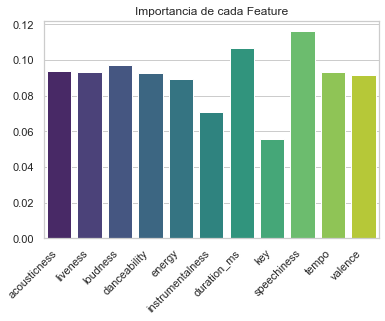

In [259]:
importances = data_clf.feature_importances_
columns = X.columns
sns.barplot(columns, importances, palette='viridis')
plt.title('Importancia de cada Feature')
plt.xticks(rotation=45, ha='right')
plt.show() 
#La variable más importante para la clasificacion es "speechiness"

El árbol de decision no pudo clasificar a las canciones del test set en las diferentes categorias, esto probablemente sea por la similitud y la forma en la que fueron creadas las categorias de la variable target. Por lo tanto, se reclasificará a la variable target como hit/nohit, donde en la categoria "nohit" estaran las canciones que anteriormente pertenecían a las categorías "unknown","unpopular" y "popular"

## 11. REDEFINICIÓN DE LA VARIABLE TARGET 

In [260]:
#Creamos una dummy
data= pd.get_dummies(data, columns = ['popularity_cat'])

In [261]:
data.columns

Index(['acousticness', 'liveness', 'loudness', 'danceability', 'energy',
       'instrumentalness', 'duration_ms', 'key', 'speechiness', 'tempo',
       'valence', 'popularity_cat_hit', 'popularity_cat_popular',
       'popularity_cat_unknown', 'popularity_cat_unpopular'],
      dtype='object')

In [262]:
data= data.drop(['popularity_cat_unknown','popularity_cat_unpopular','popularity_cat_popular'], axis=1)

In [263]:
data.head()

,acousticness,liveness,loudness,danceability,energy,instrumentalness,duration_ms,key,speechiness,tempo,valence,popularity_cat_hit
0,0.294,0.151,-7.447,0.698,0.606,0.000003,235584.0,10.0,0.0262,115.018,0.6220,0
1,0.750,0.938,-13.605,0.466,0.931,0.000000,492840.0,4.0,0.9440,79.565,0.0850,0
2,0.763,0.113,-20.254,0.719,0.126,0.000000,316578.0,3.0,0.9380,112.822,0.5330,0
3,0.770,0.917,-13.749,0.460,0.942,0.000000,558880.0,7.0,0.9430,81.260,0.0906,0
4,0.971,0.633,-7.740,0.367,0.349,0.296000,183653.0,11.0,0.0268,81.850,0.1920,0


In [264]:
data.tail() # Donde ahora "1" significa que la canción es un hit y "0" que no lo es 

,acousticness,liveness,loudness,danceability,energy,instrumentalness,duration_ms,key,speechiness,tempo,valence,popularity_cat_hit
98275,0.005640,0.0875,-4.578,0.602,0.904,0.000000,178893.0,11.0,0.0327,130.186,0.787,0
98276,0.000406,0.2420,-5.561,0.177,0.823,0.005370,213133.0,7.0,0.0604,184.260,0.363,0
98277,0.004510,0.0606,-6.614,0.539,0.883,0.000001,226107.0,6.0,0.0653,118.043,0.406,1
98278,0.333000,0.0899,-6.426,0.716,0.748,0.000007,224133.0,9.0,0.1510,110.015,0.760,1
98279,0.028400,0.4840,-4.781,0.500,0.869,0.000000,251787.0,2.0,0.0324,139.749,0.641,0


In [265]:
data.groupby(by= "popularity_cat_hit").size() #La data se encuentra desbalanceada

popularity_cat_hit
0    74870
1    23410
dtype: int64

La data ahora se encuentra desbalanceada, esto va a ser importante a la hora de aplicar los diferentes algoritmos de clasificación, ya que la mayoria de ellos se encuentra influenciado por el tamaño de la clase y por lo tanto tener un bias hacia la clase con mayor cantidad de elementos


## 12. ALGORITMOS DE CLASIFICACION CON LA "NUEVA" VARIABLE TARGET

**Vamos a asentar las hipótesis**

- H0: La canción es un hit
- H1: La canción no es un hit

### 12.1 K-Nearest Neighbor (KNN)

Para realizar KNN la data no es necesario que se encuentre balanceada porque el algoritmo no está influenciado por el tamaño de la clase

#### 12.1.1 Selección de modelo y parámetros

In [266]:
X = data[['acousticness', 'liveness', 'loudness', 'danceability', 'energy',
       'instrumentalness', 'duration_ms', 'key', 'speechiness', 'tempo',
       'valence']]
y = data[['popularity_cat_hit']]

#### 12.1.2 Entrenamiento del modelo

In [267]:
#Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [268]:
knn = KNeighborsClassifier(n_neighbors=3) #Con 3 vecinos
modelo = knn.fit(X_train, y_train)

C:\Users\Melisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



#### 12.1.3 Predicción del modelo

In [269]:
y_train_pred = knn.predict(X_train)

In [270]:
print(y_train_pred)

[0 0 1 ... 0 0 0]


In [271]:
score = modelo.score(X_test, y_test)
print(score) #el modelo tuvo un 70% de acurracy en los aciertos en el test data con 3 vecinos

0.6941391941391941


#### 12.1.4 Matriz de confusión

In [272]:
#MATRIZ DE CONFUSION
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

array([[49272,  3191],
       [ 8788,  7545]], dtype=int64)

Se observa que el algoritmo de **KNN**:

    - Predijo que la cancion no es un hit (0) y verdaderamente no eran hits: 49272 clasificaciones 
    - Predijo que la cancipon es un hit (1) y verdaderamente era un hit: 7545 clasificaciones 
    - Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1): 8788 clasificaciones (Error tipo II)
    - Predijo que la canción es un hit(1), pero verdaderamente no lo es(0): 3191 clasificaciones (Error tipo I)

El error de tipo I es el más grave ya que se rechaza la H0 (la canción es un hit) cuando en realidad la canción no lo es

### 12.2 SMOTE

Los demás algortimos de clasificación son sensibles a la cantidad de observaciones dentro de una clase. Los algoritmos Random Forest son sensibles a la data desbalanceada, ya que el algortimo tiende a sesgarse hacia la categoria con mayor cantidad de datos. La regresion logistica tambien es sensible a la data desbalanceada ya que afecta la pendiente de regresión

In [273]:
X.head()

,acousticness,liveness,loudness,danceability,energy,instrumentalness,duration_ms,key,speechiness,tempo,valence
0,0.294,0.151,-7.447,0.698,0.606,0.000003,235584.0,10.0,0.0262,115.018,0.6220
1,0.750,0.938,-13.605,0.466,0.931,0.000000,492840.0,4.0,0.9440,79.565,0.0850
2,0.763,0.113,-20.254,0.719,0.126,0.000000,316578.0,3.0,0.9380,112.822,0.5330
3,0.770,0.917,-13.749,0.460,0.942,0.000000,558880.0,7.0,0.9430,81.260,0.0906
4,0.971,0.633,-7.740,0.367,0.349,0.296000,183653.0,11.0,0.0268,81.850,0.1920


In [274]:
y.head()

,popularity_cat_hit
0,0
1,0
2,0
3,0
4,0


In [275]:
#Split traint-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [276]:
y_train.groupby(by= "popularity_cat_hit").size() #Vemos que las categorias se encuentran desbalanceadas antes del sobremuestreo

popularity_cat_hit
0    52432
1    16364
dtype: int64

In [277]:
# Estrategia de SobreMuestreo
sm = SMOTE(random_state = 42)

In [278]:
# ajuste y transformacion
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [279]:
#Despues del sobremuestreo
y_train_SMOTE.groupby(by= "popularity_cat_hit").size() # Las categorias se encuentran balanceadas entre si

popularity_cat_hit
0    52432
1    52432
dtype: int64

In [280]:
X_train_SMOTE.head()

,acousticness,liveness,loudness,danceability,energy,instrumentalness,duration_ms,key,speechiness,tempo,valence
0,0.3880,0.1220,-4.100,0.609,0.777,0.000000,197827.0,4.0,0.0487,142.103,0.703
1,0.0861,0.0625,-3.418,0.509,0.897,0.000634,162440.0,8.0,0.0454,149.864,0.283
2,0.1720,0.3710,-7.206,0.339,0.759,0.000412,235625.0,10.0,0.0674,170.574,0.121
3,0.3710,0.0985,-11.173,0.309,0.222,0.000070,210686.0,7.0,0.0319,197.820,0.177
4,0.3340,0.1110,-4.231,0.452,0.631,0.000000,184816.0,7.0,0.0343,125.042,0.340


In [281]:
y_train_SMOTE

,popularity_cat_hit
0,0
1,1
2,0
3,0
4,0
...,...
104859,1
104860,1
104861,1
104862,1


In [282]:
X_train = pd.DataFrame(X_train_SMOTE, columns=X_train_SMOTE.columns)
X_train.head()

,acousticness,liveness,loudness,danceability,energy,instrumentalness,duration_ms,key,speechiness,tempo,valence
0,0.3880,0.1220,-4.100,0.609,0.777,0.000000,197827.0,4.0,0.0487,142.103,0.703
1,0.0861,0.0625,-3.418,0.509,0.897,0.000634,162440.0,8.0,0.0454,149.864,0.283
2,0.1720,0.3710,-7.206,0.339,0.759,0.000412,235625.0,10.0,0.0674,170.574,0.121
3,0.3710,0.0985,-11.173,0.309,0.222,0.000070,210686.0,7.0,0.0319,197.820,0.177
4,0.3340,0.1110,-4.231,0.452,0.631,0.000000,184816.0,7.0,0.0343,125.042,0.340


In [283]:
#armamos el data frame para la data balanceada
data = X_train.join(y_train_SMOTE)
data.head()

,acousticness,liveness,loudness,danceability,energy,instrumentalness,duration_ms,key,speechiness,tempo,valence,popularity_cat_hit
0,0.3880,0.1220,-4.100,0.609,0.777,0.000000,197827.0,4.0,0.0487,142.103,0.703,0
1,0.0861,0.0625,-3.418,0.509,0.897,0.000634,162440.0,8.0,0.0454,149.864,0.283,1
2,0.1720,0.3710,-7.206,0.339,0.759,0.000412,235625.0,10.0,0.0674,170.574,0.121,0
3,0.3710,0.0985,-11.173,0.309,0.222,0.000070,210686.0,7.0,0.0319,197.820,0.177,0
4,0.3340,0.1110,-4.231,0.452,0.631,0.000000,184816.0,7.0,0.0343,125.042,0.340,0


In [284]:
data['popularity_cat_hit'].value_counts() #el dataset ahora se encuentra balanceado -> podemos aplicar el algoritmo

0    52432
1    52432
Name: popularity_cat_hit, dtype: int64

### 12.3 ÁRBOL DE DECISION

#### 12.3.1 Selección de modelo y parámetros

In [285]:
#separamos las variables independientes de la variable target
X = data.iloc[:,:-1]
y = data.iloc[:,11] #target

In [286]:
X

,acousticness,liveness,loudness,danceability,energy,instrumentalness,duration_ms,key,speechiness,tempo,valence
0,0.388000,0.122000,-4.100000,0.609000,0.777000,0.000000,197827.000000,4.000000,0.048700,142.103000,0.703000
1,0.086100,0.062500,-3.418000,0.509000,0.897000,0.000634,162440.000000,8.000000,0.045400,149.864000,0.283000
2,0.172000,0.371000,-7.206000,0.339000,0.759000,0.000412,235625.000000,10.000000,0.067400,170.574000,0.121000
3,0.371000,0.098500,-11.173000,0.309000,0.222000,0.000070,210686.000000,7.000000,0.031900,197.820000,0.177000
4,0.334000,0.111000,-4.231000,0.452000,0.631000,0.000000,184816.000000,7.000000,0.034300,125.042000,0.340000
...,...,...,...,...,...,...,...,...,...,...,...
104859,0.457126,0.092870,-9.180150,0.782425,0.437646,0.000010,195356.267716,8.047244,0.065239,89.890748,0.859315
104860,0.185111,0.151175,-8.358534,0.670146,0.609136,0.000006,248360.000000,6.387651,0.035719,120.684816,0.463282
104861,0.089038,0.356305,-7.617590,0.780221,0.626341,0.000034,161626.362000,0.141778,0.087386,126.630268,0.688936
104862,0.814514,0.106441,-21.897569,0.331837,0.277938,0.649186,233991.115879,4.012875,0.032933,79.929880,0.165796


In [287]:
y

0         0
1         1
2         0
3         0
4         0
         ..
104859    1
104860    1
104861    1
104862    1
104863    1
Name: popularity_cat_hit, Length: 104864, dtype: uint8

#### 12.3.2 Entrenamiento del modelo

In [288]:
#split en train y test
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y, test_size=0.3,random_state=42)

In [289]:
#arbol de decision
classifier= DecisionTreeClassifier(criterion='gini',min_samples_split=2)

In [290]:
#Entrenamos el modelo
classifier.fit(Xtrain,Ytrain) 

DecisionTreeClassifier()

#### 12.3.3 Predicción del modelo

In [291]:
predictions = classifier.predict(X_test)

#### 12.3.4 Matriz de confusión

[[16547  5891]
 [ 4596  2450]]


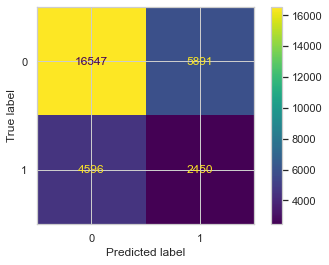

In [292]:
#Matriz de Confusión
print(confusion_matrix(y_test, predictions))

#Ploteamos la Matriz
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

Se observa que el algoritmo de **Árbol de Decisión**:

    - Predijo que la cancion no es un hit (0) y verdaderamente no eran hits: 16415 clasificaciones 
    - Predijo que la cancion es un hit (1) y verdaderamente era un hit: 2492 clasificaciones 
    - Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1): 4491 clasificaciones (Error tipo II)
    - Predijo que la canción es un hit(1), pero verdaderamente no lo es(0): 6086 clasificaciones (Error tipo I)

El error de tipo I es el más grave ya que se rechaza la H0 (la canción no es un hit) cuando en realidad la canción si lo es. Este algoritmo ha hecho muchas mas predicciones con error de tipo I que con error de tipo II

#### 12.3.5 Métricas

In [293]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}") #El algoritmo tiene muy poca precision

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")#Tiene muy bajo recall

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}") #El ratio entre estas dos medidas es muy bajo

Accuracy of the classifier is: 0.6443155609822276
Precision Score of the classifier is: 0.29372976861287614
Recall Score of the classifier is: 0.3477150156116946
F1 Score of the classifier is: 0.3184506401507766


AUC for our classifier is: 0.5437030483114831


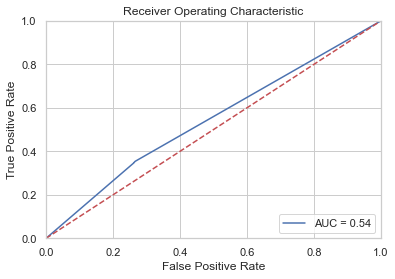

In [294]:
#CURVA - ROC

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

El algoritmo tiene un AUC de 0.54 que es muy cercano a 0.5, por lo tanto no tiene capacidad de separación entre canciones Hit y No Hit

### 12.4 RANDOM FOREST
#### 12.4.1 Selección de modelo y parámetros

Vamos a usar los mismos parametros que usamos para el Arbol de decision

In [295]:
X

,acousticness,liveness,loudness,danceability,energy,instrumentalness,duration_ms,key,speechiness,tempo,valence
0,0.388000,0.122000,-4.100000,0.609000,0.777000,0.000000,197827.000000,4.000000,0.048700,142.103000,0.703000
1,0.086100,0.062500,-3.418000,0.509000,0.897000,0.000634,162440.000000,8.000000,0.045400,149.864000,0.283000
2,0.172000,0.371000,-7.206000,0.339000,0.759000,0.000412,235625.000000,10.000000,0.067400,170.574000,0.121000
3,0.371000,0.098500,-11.173000,0.309000,0.222000,0.000070,210686.000000,7.000000,0.031900,197.820000,0.177000
4,0.334000,0.111000,-4.231000,0.452000,0.631000,0.000000,184816.000000,7.000000,0.034300,125.042000,0.340000
...,...,...,...,...,...,...,...,...,...,...,...
104859,0.457126,0.092870,-9.180150,0.782425,0.437646,0.000010,195356.267716,8.047244,0.065239,89.890748,0.859315
104860,0.185111,0.151175,-8.358534,0.670146,0.609136,0.000006,248360.000000,6.387651,0.035719,120.684816,0.463282
104861,0.089038,0.356305,-7.617590,0.780221,0.626341,0.000034,161626.362000,0.141778,0.087386,126.630268,0.688936
104862,0.814514,0.106441,-21.897569,0.331837,0.277938,0.649186,233991.115879,4.012875,0.032933,79.929880,0.165796


In [296]:
y

0         0
1         1
2         0
3         0
4         0
         ..
104859    1
104860    1
104861    1
104862    1
104863    1
Name: popularity_cat_hit, Length: 104864, dtype: uint8

#### 12.4.2 Entrenamiento del modelo

In [297]:
#Separamos en train y test!
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [298]:
#Creamos un arbol de decisión sencillo y lo fiteamos
classifier = DecisionTreeClassifier(random_state=11)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

#### 12.4.3 Predicción del modelo

In [299]:
predictions = classifier.predict(X_test) #Prediccion en Test

#### 12.4.4 Matriz de confusion

[[11586  4144]
 [ 3702 12028]]


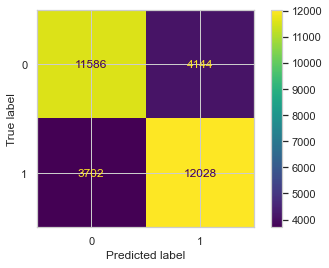

In [300]:
#Matriz de Confusión
print(confusion_matrix(y_test, predictions))

#Ploteamos la Matriz
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

Se observa que el algoritmo de **Random Forest**:

    - Predijo que la cancion no es un hit (0) y verdaderamente no eran hits: 11474 clasificaciones 
    - Predijo que la cancion es un hit (1) y verdaderamente era un hit: 11904 clasificaciones 
    - Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1): 3807 clasificaciones (Error tipo II)
    - Predijo que la canción es un hit(1), pero verdaderamente no lo es(0): 4237 clasificaciones (Error tipo I)

El error de tipo I es el más grave ya que se rechaza la H0 (la canción no es un hit) cuando en realidad la canción si lo es. Este algoritmo ha hecho muchas mas predicciones con error de tipo I que con error de tipo II

#### 12.4.5 Métricas

In [301]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}") #El algoritmo tiene un 74 % de precision

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")#Tiene un recall del 75%

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}") #El ratio entre estas dos medidas es alto

Accuracy of the classifier is: 0.7506039415130324
Precision Score of the classifier is: 0.7437546376453129
Recall Score of the classifier is: 0.764653528289892
F1 Score of the classifier is: 0.7540593066265439


AUC for our classifier is: 0.7509430091956244


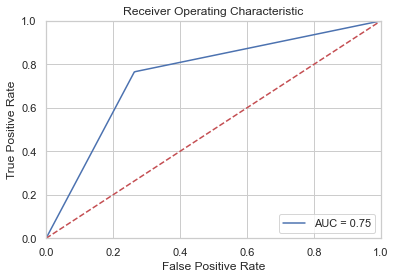

In [302]:
#CURVA - ROC

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

El algoritmo tiene un AUC de 0.74 por lo tanto hay un 74% de probabilidades que el el algoritmo clasifique a una canción como un hit en base a sus audiofeatures- > 0.8≥AUC>0.7 se considera como un excelente discriminador

### 12.5 REGRESION LOGISTICA

In [303]:
#Vamos a escalar las variables para que todas esten entre 0 y 1

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_scaled = pd.DataFrame(x_scaled, columns= data.columns)

In [304]:
data_scaled.head()

,acousticness,liveness,loudness,danceability,energy,instrumentalness,duration_ms,key,speechiness,tempo,valence,popularity_cat_hit
0,0.389558,0.122122,0.907689,0.617021,0.777,0.000000,0.327871,0.363636,0.050258,0.582306,0.707956,0.0
1,0.086446,0.062563,0.918763,0.515704,0.897,0.000634,0.268878,0.727273,0.046852,0.614109,0.284995,1.0
2,0.172691,0.371371,0.857254,0.343465,0.759,0.000412,0.390884,0.909091,0.069556,0.698974,0.121853,0.0
3,0.372490,0.098599,0.792839,0.313070,0.222,0.000070,0.349309,0.636364,0.032921,0.810621,0.178248,0.0
4,0.335341,0.111111,0.905561,0.457953,0.631,0.000000,0.306181,0.636364,0.035397,0.512394,0.342397,0.0


In [305]:
data_scaled.shape

(104864, 12)

#### 12.5.1 Selección de modelo y parámetros


In [306]:
#creamos una instancia de la regresion logistica
regresion_logistica = LogisticRegression()

In [307]:
#Separamos en X e y
X = data_scaled.drop(["popularity_cat_hit"], axis=1)
y = data_scaled["popularity_cat_hit"]

In [308]:
#Separamos en train y test!
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

#### 12.5.2 Entrenamiento del modelo

In [309]:
classifier=regresion_logistica.fit(X_train,y_train)

#### 12.5.3 Predicción del modelo

In [310]:
predictions = regresion_logistica.predict(X_test)
print(predictions)

[1. 0. 1. ... 0. 1. 1.]


#### 12.5.4 Matriz de confusion

[[ 7612  8118]
 [ 4875 10855]]


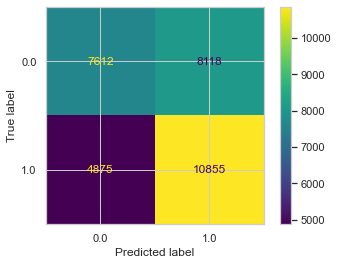

In [311]:
#Matriz de Confusión
print(confusion_matrix(y_test, predictions))

#Ploteamos la Matriz
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

Se observa que el algoritmo de **Regresión logistica**:

    - Predijo que la cancion no es un hit (0) y verdaderamente no eran hits: 7429 clasificaciones 
    - Predijo que la cancion es un hit (1) y verdaderamente era un hit: 10754 clasificaciones 
    - Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1): 4957 clasificaciones (Error tipo II)
    - Predijo que la canción es un hit(1), pero verdaderamente no lo es(0): 8282 clasificaciones (Error tipo I)

El error de tipo I es el más grave ya que se rechaza la H0 (la canción no es un hit) cuando en realidad la canción si lo es. Este algoritmo ha hecho muchas mas predicciones con error de tipo I que con error de tipo II

#### 12.5.5 Métricas

In [312]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}") 

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}") 

Accuracy of the classifier is: 0.5869993642720915
Precision Score of the classifier is: 0.5721288146313181
Recall Score of the classifier is: 0.6900826446280992
F1 Score of the classifier is: 0.6255943290205458


AUC for our classifier is: 0.6166191541221883


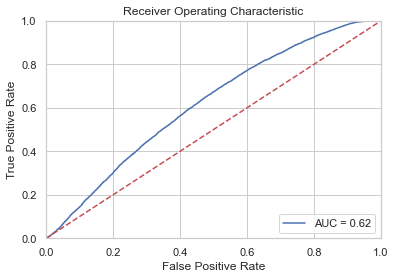

In [313]:
#CURVA - ROC

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

El algoritmo tiene un AUC de 0.61 por lo tanto hay un 60% de probabilidades que el el algoritmo clasifique a una canción como un hit en base a sus audiofeatures- > 0.6≥AUC>0.5 se considera como un pobre discriminador y 0.7≥AUC>0.6 como un discriminador aceptable

 ### 12.6 HYPERTUNING - RANDOM FOREST

In [316]:
#Separamos los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [319]:
#Instanciamos el modelo
random_forest = RandomForestRegressor() 

In [320]:
#Definimos los parámetros de búsqueda
params = {
    'n_estimators' : [100, 200, 500],
    'max_features': [2,3]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  # 
                                  cv = 5, 
                                  verbose = 1, #Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [327]:
#Entrenamos el modelo
classifier= grid_random_forest.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [328]:
#Obtenemos el mejor modelo
classifier.best_estimator_

RandomForestRegressor(max_features=3, n_estimators=200)

In [326]:
#Predicción de casos nuevos
predictions_train=grid_random_forest.predict(x_train)
predictions=grid_random_forest.predict(x_test)
predictions

array([1.  , 0.99, 0.01, ..., 0.02, 1.  , 0.  ])